# **STAT 200 Project**

#### **Ana-Maria Borduselu**


---

<br>

For your project, you must analyze data from the [COPDGene study](http://www.copdgene.org/) using the concepts covered in this course. Please follow the directions below carefully:

- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Comment all code using the `#`. This is a must!
- Include markdown cells with written answers explaining your work when prompted
- **NOTE: Your completed project must be submitted to Canvas as a .ipynb file by the assigned due date**



<br>

---

<br>






In [2]:
# Installation packages
install.packages("dslabs")
install.packages("jsonlite")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# Libraries
library(dslabs)
library(jsonlite)
library(rvest)
library(ggplot2)

## Data

Data for the project is available from three separate data sources.
  * [demographics data](https://raw.githubusercontent.com/khasenst/datasets_teaching/refs/heads/main/copd_data_demographics.csv)
  * [medical image data](https://raw.githubusercontent.com/khasenst/datasets_teaching/refs/heads/main/copd_data_imaging.json)
  * [spirometry data](https://raw.githubusercontent.com/khasenst/datasets_teaching/refs/heads/main/copd_data_spirometry.html)
  
A data dictionary describing the meaning of each of the variables in the dataset is available [here](https://raw.githubusercontent.com/khasenst/datasets_teaching/refs/heads/main/copd_data_dictionary.csv).

<br>

---

<br>






## Introduction

Chronic obstructive pulmonary disease (COPD) affects over 16 million Americans and is the fourth leading cause of death in the United States behind heart disease, cancer, and accidental death. While COPD can result from various toxic inhalations or asthma, it is most commonly associated with cigarette smoking.

<br>

COPD severity is typically measured by a device called a spirometer. Patients forcefully exhale into the device and the volume of air exhaled is used as a measure for the severity of disease (less air exhaled $\Rightarrow$ worse disease). Data collected by the COPDGene research group includes spirometry data on thousands of research participants.

<br>

Spirometry measures in the dataset:
* The forced expiratory volume (FEV1) is the volume of air exhaled in 1 second
* The forced vital capacity (FVC) is the total volume of air exhaled after a full breath
* FEV1_FVC_ratio is the ratio between FEV1 and FVC (smaller $\Rightarrow$ worse disease)
* FEV1_phase2 is the FEV1 of research participants 5 years later

<br>

You overall task in this project is to analyze the relationship between FEV1 at follow-up (FEV1_phase2) and other variables in the dataset. The project has been organized into a series of tasks to assist you with your analysis organization.

<br>

---

<br>






####<font color=red>Organized</font>
* Answers should be organized in the following format for organization and readability

<br>

```
# 1.
This will be the code block to answer the first part of a task
```

1. This will be the text answer/explanation (if prompted) for the first task

```
# 2.
This will be the code block to answer the second part of a task in a separate code cell
```

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

<br>

---






## Data Wrangling

####<font color=red>Task 1</font>

Using code covered in the course,

1. Load the COPDGene demographics dataset.

2. Load the COPDGene medical image dataset as a data frame. You must process the data to ensure the data is stored as a data frame.

3. Load the COPDGene spirometry dataset as a data frame. You must process the data to ensure the data is stored as a data frame.

In [4]:
# 1.1 Load demographics dataset
demographics_url <- "https://raw.githubusercontent.com/khasenst/datasets_teaching/refs/heads/main/copd_data_demographics.csv"
demographics <- read.csv(demographics_url)

head(demographics)

,sid,visit_year,visit_date,visit_age,gender,race,smoking_status,height_cm,weight_kg,blood_pressure_systolic,blood_pressure_diastolic,heart_rate,hours_on_oxygen,bmi,smoke_start_age,cigs_per_day_avg,duration_smoking,respiratory
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>
1,10005Q,2008,1/15/2008,54.5,2,1,2,159.9,73.0,130,80,87,0,28.55,14,20,40.5,
2,10055F,2008,3/15/2008,69.0,1,2,1,178.0,90.7,168,100,55,0,28.63,18,20,20.0,hay fever
3,10056H,2008,2/15/2008,48.7,2,1,1,153.7,86.2,100,53,98,24,36.49,12,40,36.0,asthma|bronchitis attacks|chronic bronchitis|pneumonia|emphysema|copd|sleep apnea
4,10060Y,2008,5/15/2008,72.8,1,1,1,177.0,89.6,147,71,87,24,28.60,17,30,54.0,asthma|bronchitis attacks|chronic bronchitis|emphysema|copd
5,10068O,2008,3/15/2008,76.2,2,1,1,155.0,55.0,134,78,92,0,22.89,18,20,52.0,hay fever|bronchitis attacks|chronic bronchitis|pneumonia|emphysema|copd
6,10072F,2008,3/15/2008,70.0,2,1,1,165.1,76.1,92,58,77,12,27.92,16,40,48.0,pneumonia|emphysema|copd


In [5]:
#1.2 Load medical image dataset
imaging_url <- "https://raw.githubusercontent.com/khasenst/datasets_teaching/refs/heads/main/copd_data_imaging.json"
imaging_list <- fromJSON(imaging_url)
imaging_df   <- as.data.frame(imaging_list)
head(imaging_df)

,sid,lung_volume_inspiratory,emphysema_percentage,lung_volume_expiratory,gas_trapping_percentage,mean_density_inspiratory,mean_density_expiratory
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,24838L,4.1956,1.3740,2.2976,10.5587,-829.631,-684.559
2,14901M,5.7800,3.7793,2.9900,11.6639,-836.006,-674.285
3,11357A,5.4958,4.7153,2.7493,16.9214,-855.705,-727.824
4,20152J,4.9409,8.4237,3.2121,39.4071,-850.767,-777.023
5,21437E,4.6451,0.0600,2.9805,2.6216,-762.127,-656.432
6,15807Z,5.6987,2.1956,3.0119,12.5120,-844.875,-710.280


In [6]:
#1.3 Load spirometry dataset
spirometry_url <- "https://raw.githubusercontent.com/khasenst/datasets_teaching/refs/heads/main/copd_data_spirometry.html"
spirometry_page <- read_html(spirometry_url)
spirometry_tables <- html_table(spirometry_page)
spirometry_df <- as.data.frame(spirometry_tables[[1]])
head(spirometry_df)

,sid,fev1_fvc_ratio,fev1,fvc,fev1_phase2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,22035P,0.62,3.672,5.954,3.484
2,25109H,0.81,1.968,2.432,2.049
3,10127E,0.83,2.319,2.788,2.133
4,15450K,0.51,2.398,4.745,1.424
5,13689J,0.75,3.938,5.273,3.571
6,15749L,0.81,2.784,3.446,2.309


<br>

<br>


---






####<font color=red>Task 2</font>

Using code covered in the course,

1. Merge the demographics, medical imaging, and spirometry datasets by the anonymized ID into a single dataset. Be sure to keep all rows from all datasets.

  Hint: You should have 2,620 observations after the merge.

In [7]:
#2.1
# Merge demographics and imaging by sid
demo_imaging <- merge(
  x     = demographics,
  y     = imaging_df,
  by.x  = "sid",
  by.y  = "sid",
  all.x = TRUE,
  all.y = TRUE
)

# Merge the result with spirometry by sid
copd_data <- merge(
  x     = demo_imaging,
  y     = spirometry_df,
  by.x  = "sid",
  by.y  = "sid",
  all.x = TRUE,
  all.y = TRUE
)

nrow(copd_data)
head(copd_data)

[1] 2620

,sid,visit_year,visit_date,visit_age,gender,race,smoking_status,height_cm,weight_kg,blood_pressure_systolic,⋯,lung_volume_inspiratory,emphysema_percentage,lung_volume_expiratory,gas_trapping_percentage,mean_density_inspiratory,mean_density_expiratory,fev1_fvc_ratio,fev1,fvc,fev1_phase2
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10005Q,2008,1/15/2008,54.5,2,1,2,159.9,73.0,130,⋯,5.6636,0.9269,2.4766,6.8008,-830.343,-650.526,0.77,2.921,3.805,2.622
2,10055F,2008,3/15/2008,69.0,1,2,1,178.0,90.7,168,⋯,4.9060,1.9452,1.9057,10.6835,-823.746,-638.442,0.73,2.917,3.999,2.439
3,10056H,2008,2/15/2008,48.7,2,1,1,153.7,86.2,100,⋯,4.8654,11.3832,4.0606,47.8811,-836.281,-797.471,0.29,0.374,1.281,0.379
4,10060Y,2008,5/15/2008,72.8,1,1,1,177.0,89.6,147,⋯,7.3304,19.2623,5.3342,53.4747,-867.254,-821.256,0.29,0.706,2.424,1.405
5,10068O,2008,3/15/2008,76.2,2,1,1,155.0,55.0,134,⋯,6.0099,41.7757,4.1552,66.1621,-903.436,-856.337,0.46,0.806,1.736,0.580
6,10072F,2008,3/15/2008,70.0,2,1,1,165.1,76.1,92,⋯,3.9788,2.4735,2.8876,31.0631,-816.235,-747.113,0.57,1.573,2.752,1.477


<br>

<br>

<br>

---

<br>






####<font color=red>Task 3</font>

Using code covered in the course,

1. Convert the variables `gender`, `race`, and `smoking_status` to factors

2. Reassign the levels appropriately. Hint: See data dictionary.

In [8]:
# 3.1 Convert the variables gender, race, and smoking_status to factors
# Gender
copd_data$gender <- as.factor(copd_data$gender)

# Race
copd_data$race <- as.factor(copd_data$race)

# Smoking Status
copd_data$smoking_status <- as.factor(copd_data$smoking_status)

head(copd_data)

,sid,visit_year,visit_date,visit_age,gender,race,smoking_status,height_cm,weight_kg,blood_pressure_systolic,⋯,lung_volume_inspiratory,emphysema_percentage,lung_volume_expiratory,gas_trapping_percentage,mean_density_inspiratory,mean_density_expiratory,fev1_fvc_ratio,fev1,fvc,fev1_phase2
,<chr>,<int>,<chr>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10005Q,2008,1/15/2008,54.5,2,1,2,159.9,73.0,130,⋯,5.6636,0.9269,2.4766,6.8008,-830.343,-650.526,0.77,2.921,3.805,2.622
2,10055F,2008,3/15/2008,69.0,1,2,1,178.0,90.7,168,⋯,4.9060,1.9452,1.9057,10.6835,-823.746,-638.442,0.73,2.917,3.999,2.439
3,10056H,2008,2/15/2008,48.7,2,1,1,153.7,86.2,100,⋯,4.8654,11.3832,4.0606,47.8811,-836.281,-797.471,0.29,0.374,1.281,0.379
4,10060Y,2008,5/15/2008,72.8,1,1,1,177.0,89.6,147,⋯,7.3304,19.2623,5.3342,53.4747,-867.254,-821.256,0.29,0.706,2.424,1.405
5,10068O,2008,3/15/2008,76.2,2,1,1,155.0,55.0,134,⋯,6.0099,41.7757,4.1552,66.1621,-903.436,-856.337,0.46,0.806,1.736,0.580
6,10072F,2008,3/15/2008,70.0,2,1,1,165.1,76.1,92,⋯,3.9788,2.4735,2.8876,31.0631,-816.235,-747.113,0.57,1.573,2.752,1.477


In [9]:
#3.2 Reassign the levels appropriately.
# Gender
levels(copd_data$gender) <- c("Male", "Female")

# Race
levels(copd_data$race) <- c("White", "African American")

# Smoking Status
levels(copd_data$smoking_status) <- c("Current smoker", "Former smoker")


head(copd_data)

,sid,visit_year,visit_date,visit_age,gender,race,smoking_status,height_cm,weight_kg,blood_pressure_systolic,⋯,lung_volume_inspiratory,emphysema_percentage,lung_volume_expiratory,gas_trapping_percentage,mean_density_inspiratory,mean_density_expiratory,fev1_fvc_ratio,fev1,fvc,fev1_phase2
,<chr>,<int>,<chr>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10005Q,2008,1/15/2008,54.5,Female,White,Former smoker,159.9,73.0,130,⋯,5.6636,0.9269,2.4766,6.8008,-830.343,-650.526,0.77,2.921,3.805,2.622
2,10055F,2008,3/15/2008,69.0,Male,African American,Current smoker,178.0,90.7,168,⋯,4.9060,1.9452,1.9057,10.6835,-823.746,-638.442,0.73,2.917,3.999,2.439
3,10056H,2008,2/15/2008,48.7,Female,White,Current smoker,153.7,86.2,100,⋯,4.8654,11.3832,4.0606,47.8811,-836.281,-797.471,0.29,0.374,1.281,0.379
4,10060Y,2008,5/15/2008,72.8,Male,White,Current smoker,177.0,89.6,147,⋯,7.3304,19.2623,5.3342,53.4747,-867.254,-821.256,0.29,0.706,2.424,1.405
5,10068O,2008,3/15/2008,76.2,Female,White,Current smoker,155.0,55.0,134,⋯,6.0099,41.7757,4.1552,66.1621,-903.436,-856.337,0.46,0.806,1.736,0.580
6,10072F,2008,3/15/2008,70.0,Female,White,Current smoker,165.1,76.1,92,⋯,3.9788,2.4735,2.8876,31.0631,-816.235,-747.113,0.57,1.573,2.752,1.477


<br>

<br>

<br>

---

<br>






####<font color=red>Task 4</font>

Using code covered in the course,

1. Convert heights to inches and weight to pounds

In [10]:
#4.1 Convert heights to inches and weight to pounds

# Height cm -> in
copd_data$height_in <- copd_data$height_cm / 2.54

# Weight kg -> lb
copd_data$weight_lb <- copd_data$weight_kg * 2.20462

head(copd_data)
str(copd_data)


,sid,visit_year,visit_date,visit_age,gender,race,smoking_status,height_cm,weight_kg,blood_pressure_systolic,⋯,lung_volume_expiratory,gas_trapping_percentage,mean_density_inspiratory,mean_density_expiratory,fev1_fvc_ratio,fev1,fvc,fev1_phase2,height_in,weight_lb
,<chr>,<int>,<chr>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10005Q,2008,1/15/2008,54.5,Female,White,Former smoker,159.9,73.0,130,⋯,2.4766,6.8008,-830.343,-650.526,0.77,2.921,3.805,2.622,62.95276,160.9373
2,10055F,2008,3/15/2008,69.0,Male,African American,Current smoker,178.0,90.7,168,⋯,1.9057,10.6835,-823.746,-638.442,0.73,2.917,3.999,2.439,70.07874,199.9590
3,10056H,2008,2/15/2008,48.7,Female,White,Current smoker,153.7,86.2,100,⋯,4.0606,47.8811,-836.281,-797.471,0.29,0.374,1.281,0.379,60.51181,190.0382
4,10060Y,2008,5/15/2008,72.8,Male,White,Current smoker,177.0,89.6,147,⋯,5.3342,53.4747,-867.254,-821.256,0.29,0.706,2.424,1.405,69.68504,197.5340
5,10068O,2008,3/15/2008,76.2,Female,White,Current smoker,155.0,55.0,134,⋯,4.1552,66.1621,-903.436,-856.337,0.46,0.806,1.736,0.580,61.02362,121.2541
6,10072F,2008,3/15/2008,70.0,Female,White,Current smoker,165.1,76.1,92,⋯,2.8876,31.0631,-816.235,-747.113,0.57,1.573,2.752,1.477,65.00000,167.7716


'data.frame':	2620 obs. of  30 variables:
 $ sid                     : chr  "10005Q" "10055F" "10056H" "10060Y" ...
 $ visit_year              : int  2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 ...
 $ visit_date              : chr  "1/15/2008" "3/15/2008" "2/15/2008" "5/15/2008" ...
 $ visit_age               : num  54.5 69 48.7 72.8 76.2 70 61.8 69.6 47.8 71.5 ...
 $ gender                  : Factor w/ 2 levels "Male","Female": 2 1 2 1 2 2 1 2 1 1 ...
 $ race                    : Factor w/ 2 levels "White","African American": 1 2 1 1 1 1 1 1 1 1 ...
 $ smoking_status          : Factor w/ 2 levels "Current smoker",..: 2 1 1 1 1 1 1 1 2 1 ...
 $ height_cm               : num  160 178 154 177 155 ...
 $ weight_kg               : num  73 90.7 86.2 89.6 55 ...
 $ blood_pressure_systolic : int  130 168 100 147 134 92 108 144 139 140 ...
 $ blood_pressure_diastolic: int  80 100 53 71 78 58 78 90 90 75 ...
 $ heart_rate              : int  87 55 98 87 92 77 72 110 87 73 ...
 $ hours_on_

<br>

<br>

<br>

---

<br>






####<font color=red>Task 5</font>

Using code on ***text processing*** covered in the course,

1. Convert the `respiratory` variable into eight separate variables

  * `hay_fever` - `"Yes"` or `"No"`
  * `asthma` - `"Yes"` or `"No"`
  * `bronchitis_attacks` - `"Yes"` or `"No"`
  * `chronic_bronchitis` - `"Yes"` or `"No"`
  * `pneumonia` - `"Yes"` or `"No"`
  * `emphysema` - `"Yes"` or `"No"`
  * `copd` - `"Yes"` or `"No"`
  * `sleep_apnea` - `"Yes"` or `"No"`

In [11]:
#5.1 Convert the respiratory variable into eight separate variables

# Replace NA with empty strings
copd_data$respiratory[is.na(copd_data$respiratory)] <- ""

# the pattern we're searching
patterns  <- c("hay fever",
               "asthma",
               "bronchitis attacks",
               "chronic bronchitis",
               "pneumonia",
               "emphysema",
               "\\bcopd\\b",
               "sleep apnea")

# the names of the new columns
new_cols   <- c("hay_fever",
                "asthma",
                "bronchitis_attacks",
                "chronic_bronchitis",
                "pneumonia",
                "emphysema",
                "copd",
                "sleep_apnea")

# 1 new column for each condition
for (i in seq_along(patterns)) {
  pat <- patterns[i]
  col <- new_cols[i]

  copd_data[[col]] <- ifelse(
    grepl(pat, copd_data$respiratory, ignore.case = TRUE),
    "Yes",
    "No"
  )

}

head(copd_data)
str(copd_data)

,sid,visit_year,visit_date,visit_age,gender,race,smoking_status,height_cm,weight_kg,blood_pressure_systolic,⋯,height_in,weight_lb,hay_fever,asthma,bronchitis_attacks,chronic_bronchitis,pneumonia,emphysema,copd,sleep_apnea
,<chr>,<int>,<chr>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,10005Q,2008,1/15/2008,54.5,Female,White,Former smoker,159.9,73.0,130,⋯,62.95276,160.9373,No,No,No,No,No,No,No,No
2,10055F,2008,3/15/2008,69.0,Male,African American,Current smoker,178.0,90.7,168,⋯,70.07874,199.9590,Yes,No,No,No,No,No,No,No
3,10056H,2008,2/15/2008,48.7,Female,White,Current smoker,153.7,86.2,100,⋯,60.51181,190.0382,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,10060Y,2008,5/15/2008,72.8,Male,White,Current smoker,177.0,89.6,147,⋯,69.68504,197.5340,No,Yes,Yes,Yes,No,Yes,Yes,No
5,10068O,2008,3/15/2008,76.2,Female,White,Current smoker,155.0,55.0,134,⋯,61.02362,121.2541,Yes,No,Yes,Yes,Yes,Yes,Yes,No
6,10072F,2008,3/15/2008,70.0,Female,White,Current smoker,165.1,76.1,92,⋯,65.00000,167.7716,No,No,No,No,Yes,Yes,Yes,No


'data.frame':	2620 obs. of  38 variables:
 $ sid                     : chr  "10005Q" "10055F" "10056H" "10060Y" ...
 $ visit_year              : int  2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 ...
 $ visit_date              : chr  "1/15/2008" "3/15/2008" "2/15/2008" "5/15/2008" ...
 $ visit_age               : num  54.5 69 48.7 72.8 76.2 70 61.8 69.6 47.8 71.5 ...
 $ gender                  : Factor w/ 2 levels "Male","Female": 2 1 2 1 2 2 1 2 1 1 ...
 $ race                    : Factor w/ 2 levels "White","African American": 1 2 1 1 1 1 1 1 1 1 ...
 $ smoking_status          : Factor w/ 2 levels "Current smoker",..: 2 1 1 1 1 1 1 1 2 1 ...
 $ height_cm               : num  160 178 154 177 155 ...
 $ weight_kg               : num  73 90.7 86.2 89.6 55 ...
 $ blood_pressure_systolic : int  130 168 100 147 134 92 108 144 139 140 ...
 $ blood_pressure_diastolic: int  80 100 53 71 78 58 78 90 90 75 ...
 $ heart_rate              : int  87 55 98 87 92 77 72 110 87 73 ...
 $ hours_on_

<br>

<br>

<br>

---

<br>






####<font color=red>Task 6</font>

Using code covered in the course,

1. Convert any other variables to their appropriate data structure for analysis

In [12]:
#6.1 Convert any other variables to their appropriate data structure

# date format for visit_date
copd_data$visit_date <- as.Date(copd_data$visit_date, format = "%m/%d/%Y")


# transform into factors
resp_cols <- c(
  "hay_fever", "asthma", "bronchitis_attacks",
  "chronic_bronchitis", "pneumonia", "emphysema",
  "copd", "sleep_apnea"
)
for (col in resp_cols) {
  copd_data[[col]] <- factor(copd_data[[col]], levels = c("No", "Yes"))
}

str(copd_data)

'data.frame':	2620 obs. of  38 variables:
 $ sid                     : chr  "10005Q" "10055F" "10056H" "10060Y" ...
 $ visit_year              : int  2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 ...
 $ visit_date              : Date, format: "2008-01-15" "2008-03-15" ...
 $ visit_age               : num  54.5 69 48.7 72.8 76.2 70 61.8 69.6 47.8 71.5 ...
 $ gender                  : Factor w/ 2 levels "Male","Female": 2 1 2 1 2 2 1 2 1 1 ...
 $ race                    : Factor w/ 2 levels "White","African American": 1 2 1 1 1 1 1 1 1 1 ...
 $ smoking_status          : Factor w/ 2 levels "Current smoker",..: 2 1 1 1 1 1 1 1 2 1 ...
 $ height_cm               : num  160 178 154 177 155 ...
 $ weight_kg               : num  73 90.7 86.2 89.6 55 ...
 $ blood_pressure_systolic : int  130 168 100 147 134 92 108 144 139 140 ...
 $ blood_pressure_diastolic: int  80 100 53 71 78 58 78 90 90 75 ...
 $ heart_rate              : int  87 55 98 87 92 77 72 110 87 73 ...
 $ hours_on_oxygen       

<br>

<br>

<br>

---

<br>






####<font color=red>Task 7</font>

Using code covered in the course,

1. Remove the `height_cm`, `height_kg`, and `respiratory` columns

2. Export your data as a `.csv` file.

2. Be sure to include this "clean" `.csv` file in your submission as file called `copd_data.csv`

In [13]:
#7.1 Remove the height_cm, height_kg, and respiratory columns

# Before
str(copd_data)

# Remove height_cm
copd_data$height_cm <- NULL

# Remove height_kg
copd_data$weight_kg <- NULL

# Remove respiratory
copd_data$respiratory <- NULL

# After
str(copd_data)

'data.frame':	2620 obs. of  38 variables:
 $ sid                     : chr  "10005Q" "10055F" "10056H" "10060Y" ...
 $ visit_year              : int  2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 ...
 $ visit_date              : Date, format: "2008-01-15" "2008-03-15" ...
 $ visit_age               : num  54.5 69 48.7 72.8 76.2 70 61.8 69.6 47.8 71.5 ...
 $ gender                  : Factor w/ 2 levels "Male","Female": 2 1 2 1 2 2 1 2 1 1 ...
 $ race                    : Factor w/ 2 levels "White","African American": 1 2 1 1 1 1 1 1 1 1 ...
 $ smoking_status          : Factor w/ 2 levels "Current smoker",..: 2 1 1 1 1 1 1 1 2 1 ...
 $ height_cm               : num  160 178 154 177 155 ...
 $ weight_kg               : num  73 90.7 86.2 89.6 55 ...
 $ blood_pressure_systolic : int  130 168 100 147 134 92 108 144 139 140 ...
 $ blood_pressure_diastolic: int  80 100 53 71 78 58 78 90 90 75 ...
 $ heart_rate              : int  87 55 98 87 92 77 72 110 87 73 ...
 $ hours_on_oxygen       

In [14]:
#7.2 and 7.3

# Export
write.csv(copd_data, "copd_data.csv", row.names = TRUE)



<br>

<br>

---






## Descriptive Statistics and Exploratory Analysis

####<font color=red>Task 8</font>

Using code covered in the course,

1. Create a function with the following attributes:

  * Takes a single variable/column from your Task 7 data frame as input
  * If the variable is
    * numeric or integer, returns the mean and standard deviation
    * character or factor, returns the frequency (count) of each unique level

In [15]:
#8.1 Summary Column

summarize_column <- function(x) {
# num or int → return mean and standard deviation
  if (is.numeric(x) || is.integer(x)) {
    return(c(
      mean = mean(x, na.rm = TRUE),
      sd   = sd(x, na.rm = TRUE),
      NAs  = sum(is.na(x))
    ))
  }

  # char or fact → return frequency
  else if (is.character(x) || is.factor(x)) {
    return(table(x, useNA = "always"))
  }

  else {
    return("Unsupported data type")
  }
}

#Gender
summarize_column(copd_data$gender)

# Visit Age
summarize_column(copd_data$visit_age)


x
  Male Female   <NA> 
  1333   1287      0 

mean        sd       NAs 
59.960324  8.705162  0.000000

<br>

<br>

<br>

---

<br>






####<font color=red>Task 9</font>

Using code covered in the course,
  
1. Apply your function from Task 8 to each column of the data frame using a ***loop***

  Hint: You can use either a `for` loop or one of the functions from the apply family

2. What are your observations? Do you observe `NA`s? If so, remove those rows before proceeding with your analysis

In [16]:
#9.1

summary_results <- list()

for (colname in names(copd_data)) {
  summary_results[[colname]] <- summarize_column(copd_data[[colname]])
}

summary_results
dim(copd_data)

$sid
x
10005Q 10055F 10056H 10060Y 10068O 10072F 10076N 10083K 10088U 10090H 10104S 
     1      1      1      1      1      1      1      1      1      1      1 
10105U 10107Y 10116Z 10120Q 10123W 10125A 10127E 10131V 10132X 10153F 10155J 
     1      1      1      1      1      1      1      1      1      1      1 
10157N 10161E 10168S 10169U 10170F 10179X 10181K 10184Q 10191N 10192P 10213X 
     1      1      1      1      1      1      1      1      1      1      1 
10214Z 10216D 10217F 10222Y 10223A 10224C 10225E 10226G 10227I 10233D 10234F 
     1      1      1      1      1      1      1      1      1      1      1 
10235H 10243G 10245K 10250D 10253J 10255N 10256P 10258T 10263M 10265Q 10269Y 
     1      1      1      1      1      1      1      1      1      1      1 
10270J 10275T 10283S 10285W 10291R 10294X 10307G 10314D 10317J 10322C 10332F 
     1      1      1      1      1      1      1      1      1      1      1 
10335L 10348U 10371P 10374V 10381S 10394B 10395D 10400W 1

[1] 2620   35

In [17]:
# 9.2
copd_data <- na.omit(copd_data)
for (colname in names(copd_data)) {
  summary_results[[colname]] <- summarize_column(copd_data[[colname]])
}

#summary_results
dim(copd_data)

[1] 2600   35

**Task 9.2**<br>
What are your observations?

* We can observe that all demographic and most clinical variables have no missing values.
* However, several imaging and spirometry measures each have 10 missing entries.
*  We find these missing values in: lung_volume_inspiratory, emphysema_percentage, lung_volume_expiratory, gas_trapping_percentage, mean_density_inspiratory, mean_density_expiratory, fev1_fvc_ratio, fev1, fvc and fev1_phase2.
* All the reposrted missing values are equal to 10. all report NAs = 10.
<br><br>

* After removing the missing values, we fin that there were 20 subjects with missing vlaues. There for we'll be dropping them for the following analysis.

<br>

<br>

<br>

---

<br>






####<font color=red>Task 10</font>

Using `ggplot` code covered in the course,
  
1. Plot a histogram of each of the numeric and integer variables in your data frame. Note that a loop would make this easier!

2. Are there any variables that are highly skewed? If so, transform these variables using an appropriate transformation.

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


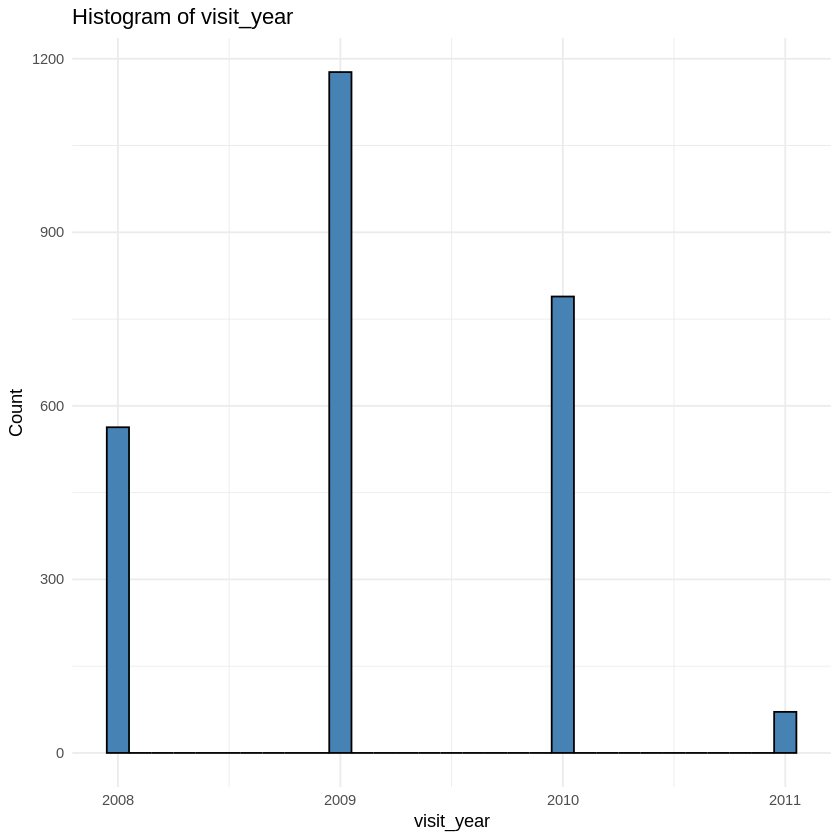

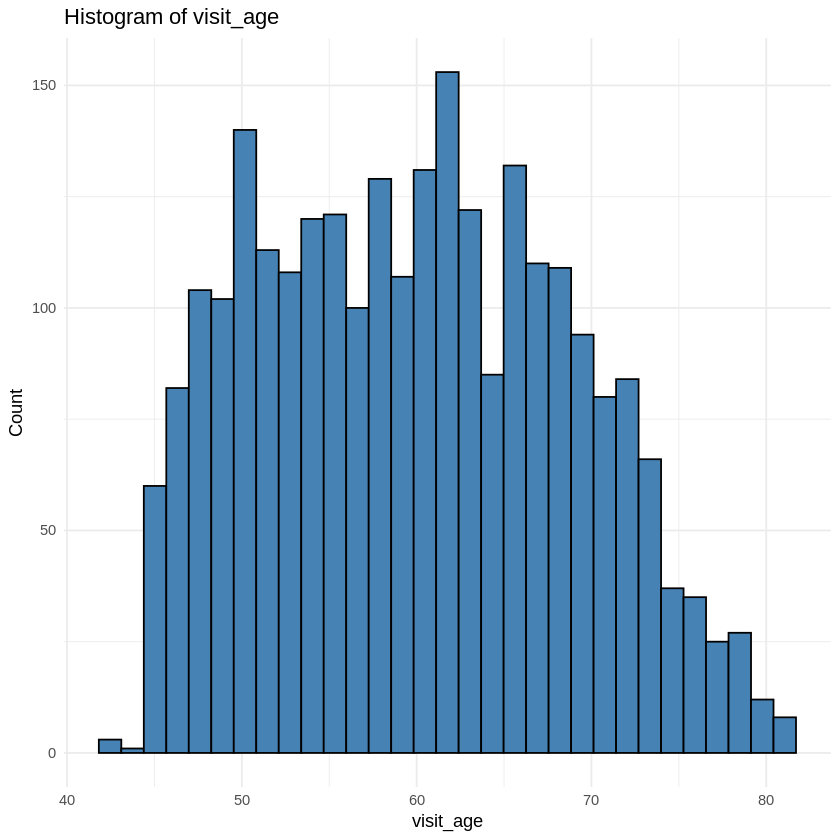

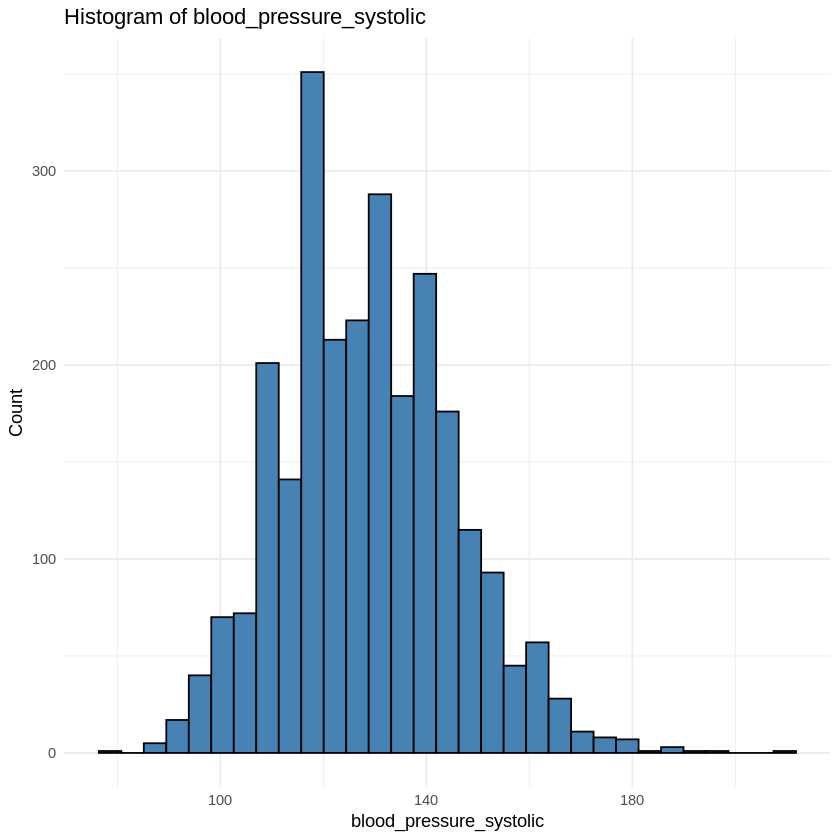

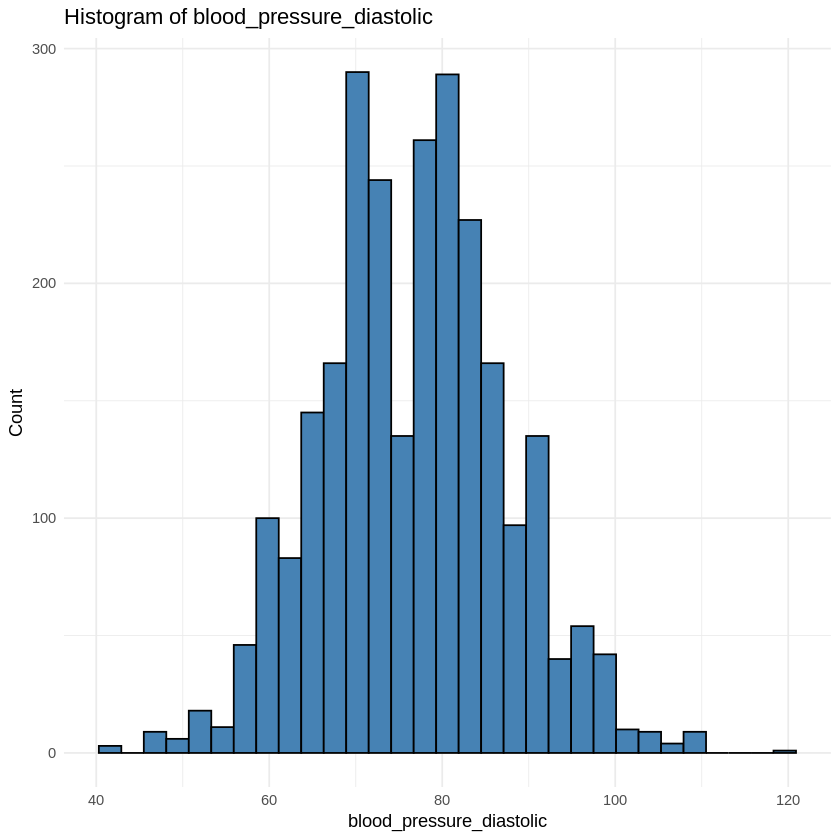

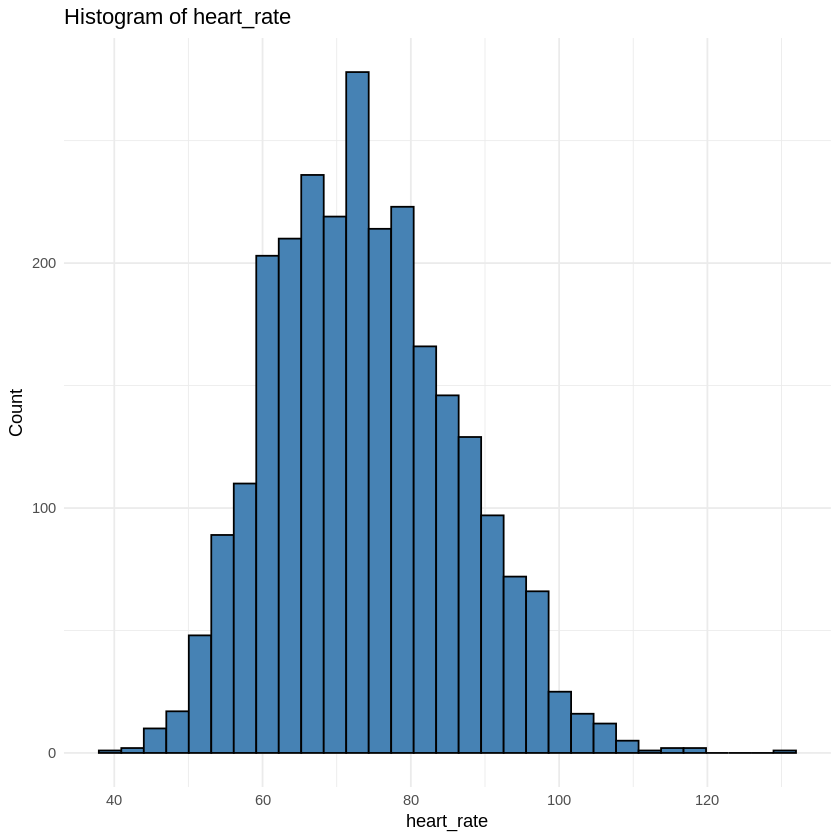

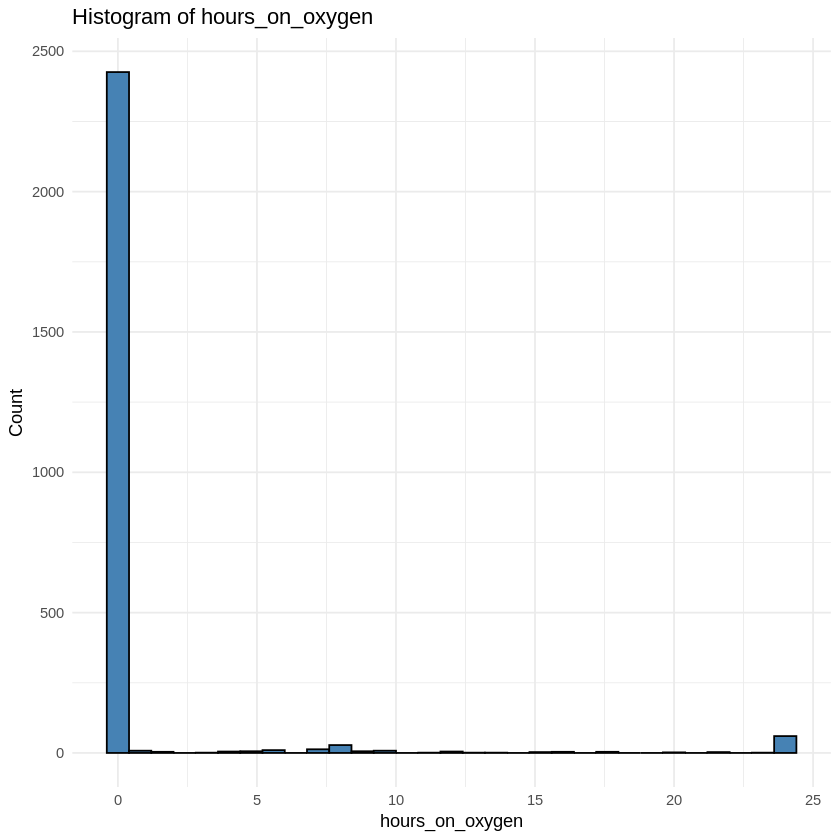

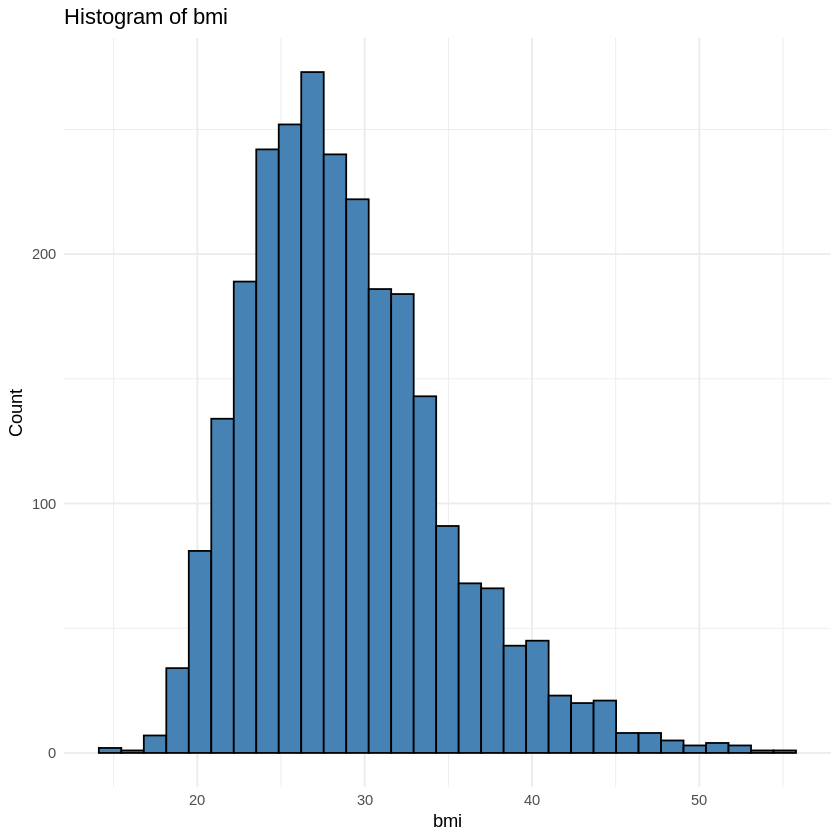

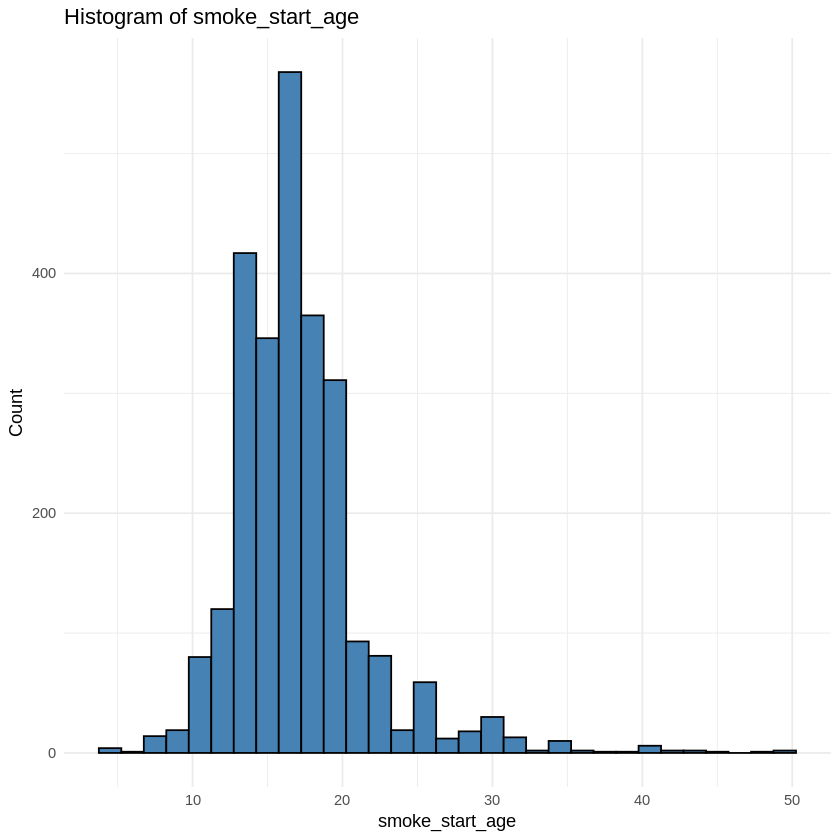

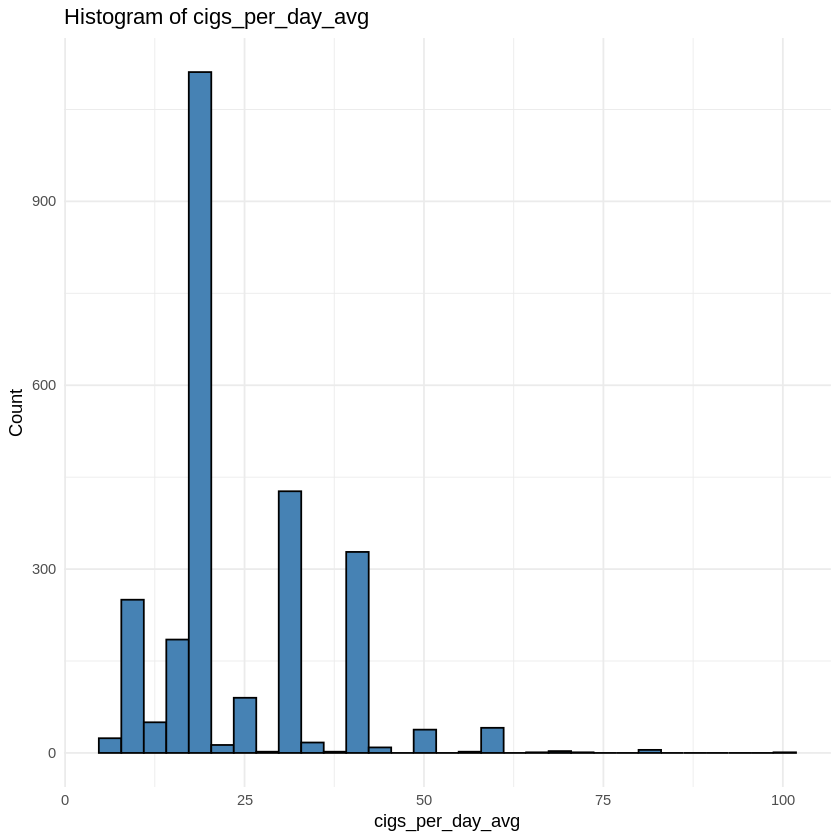

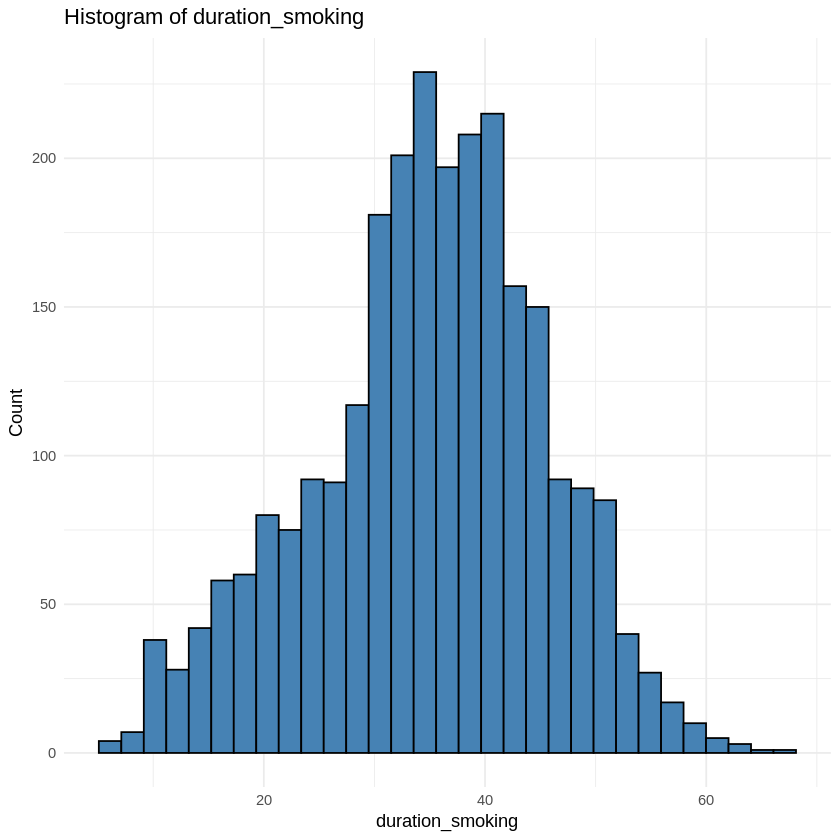

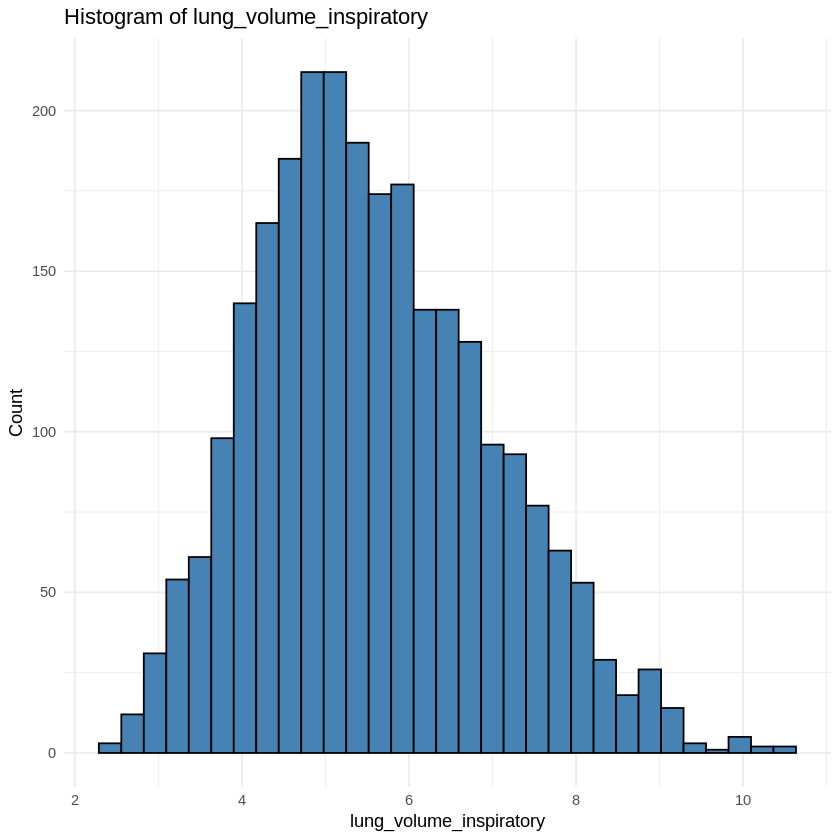

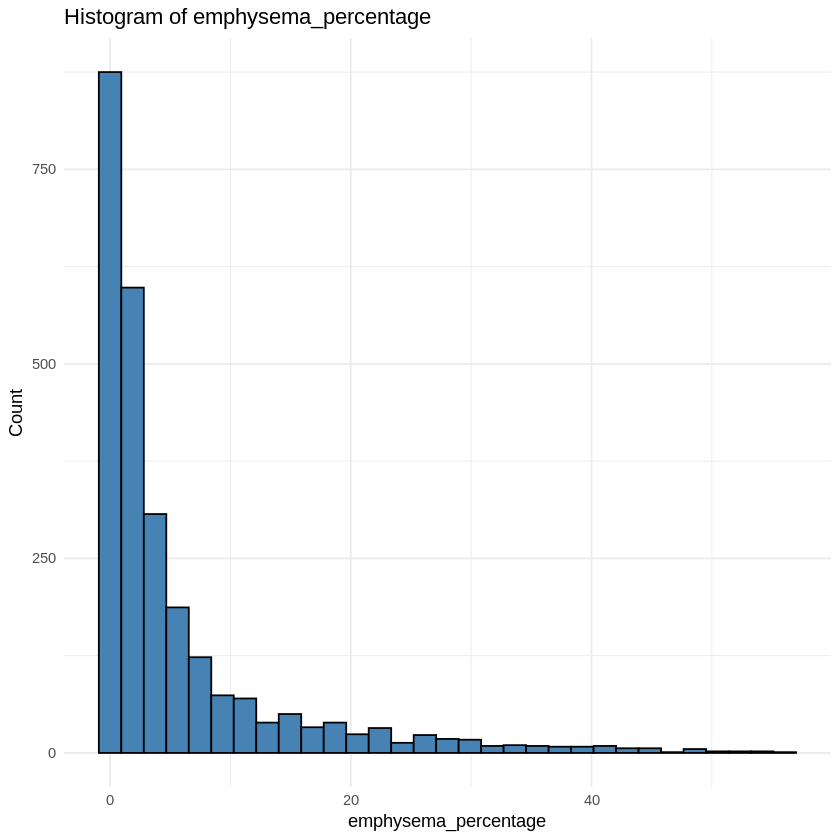

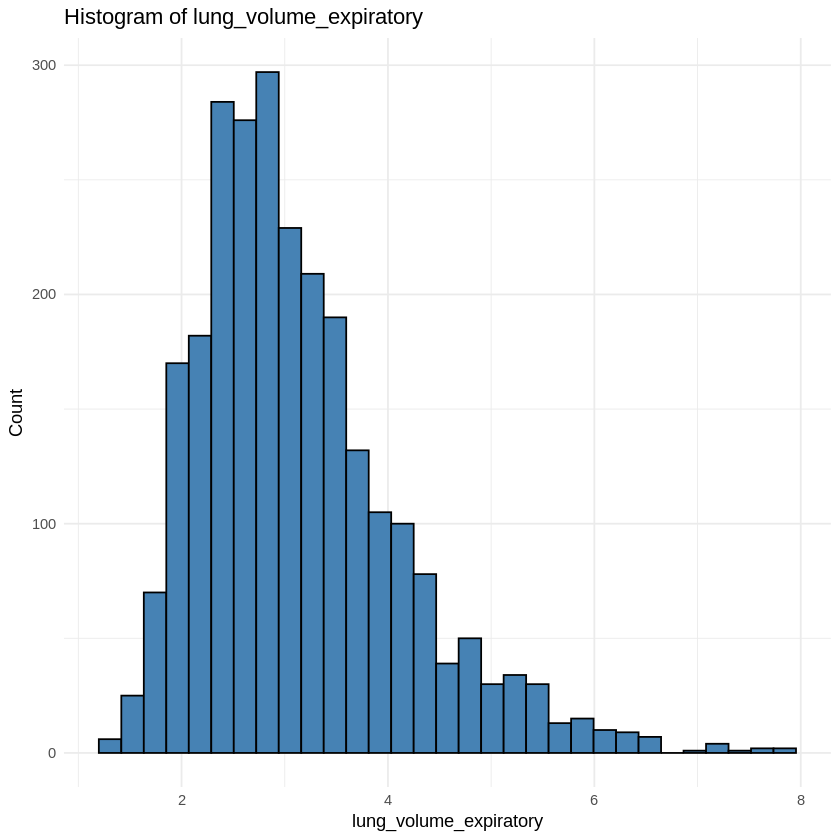

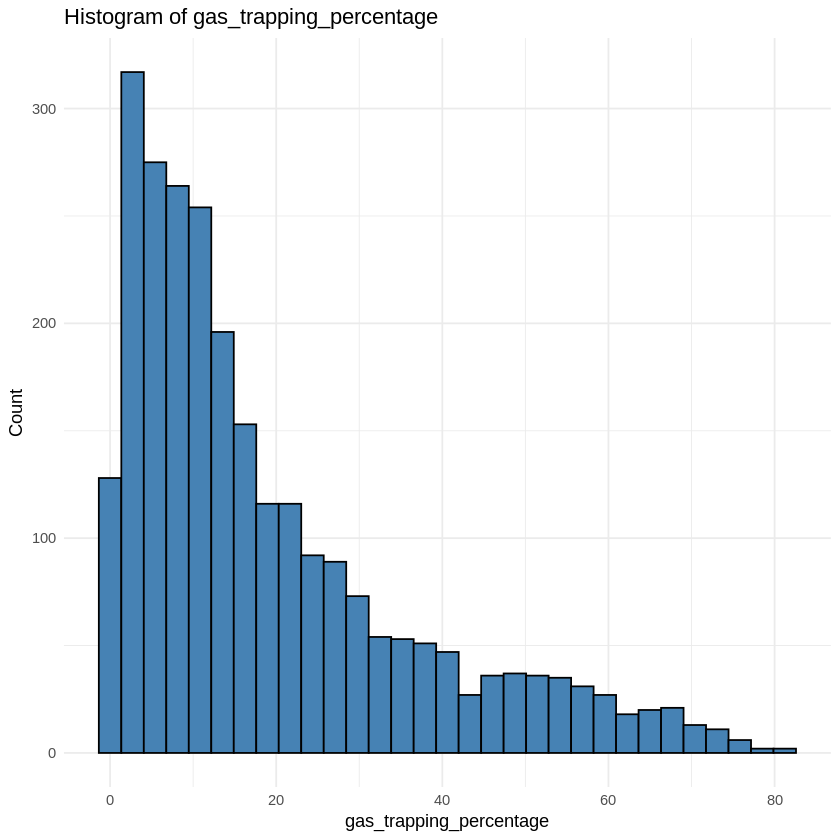

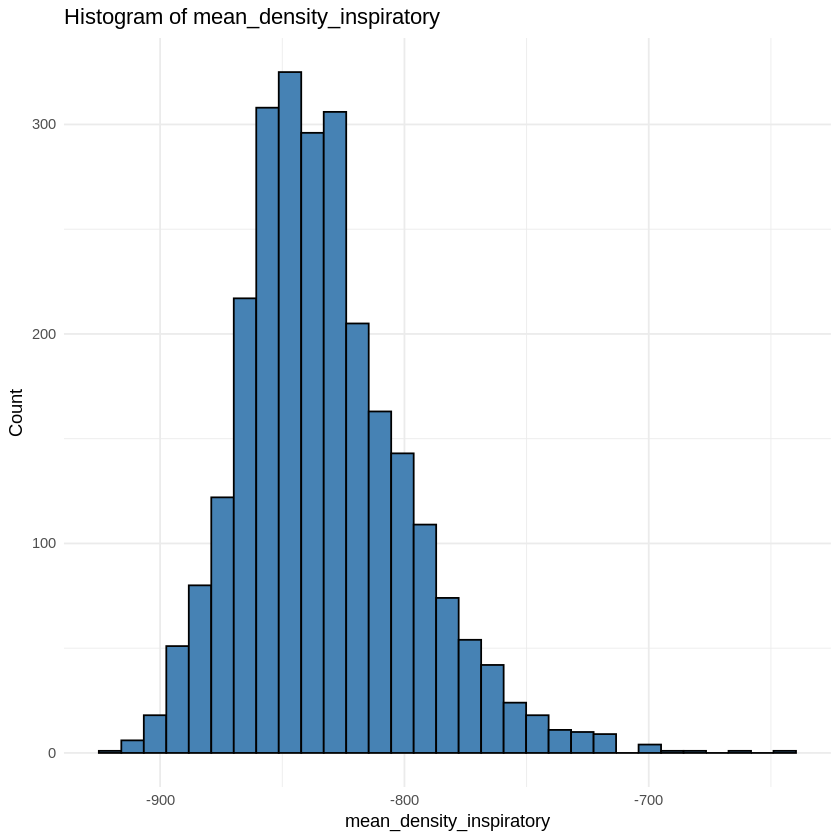

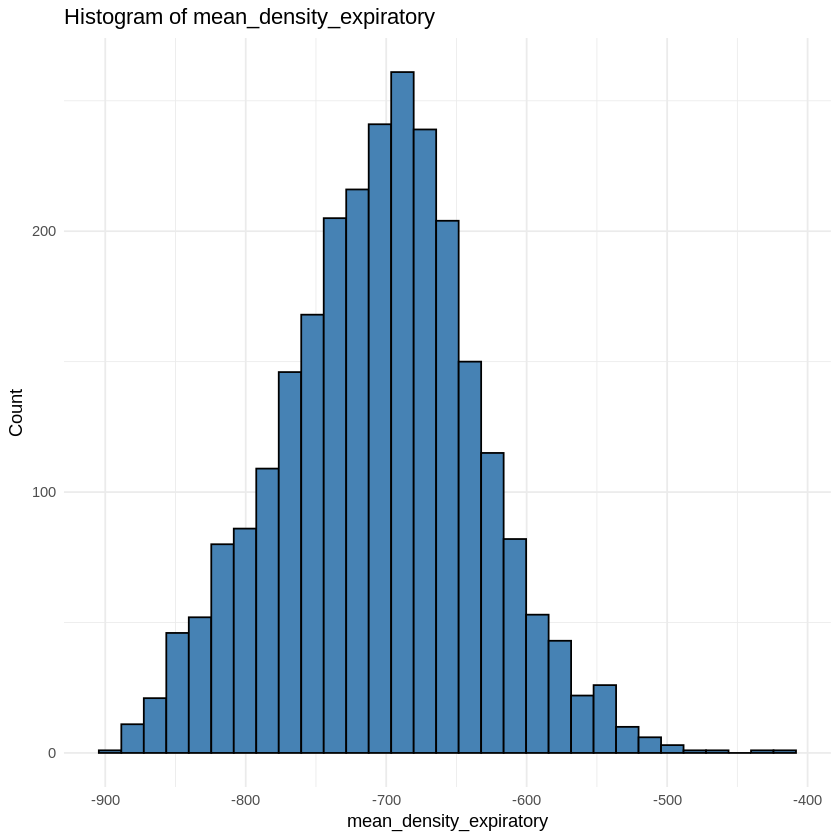

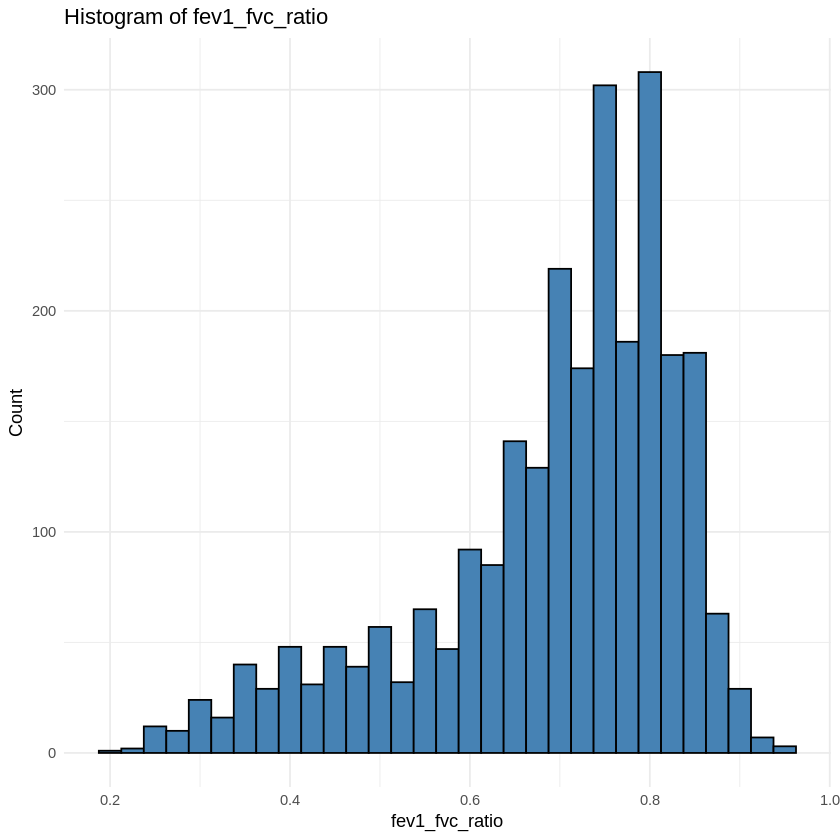

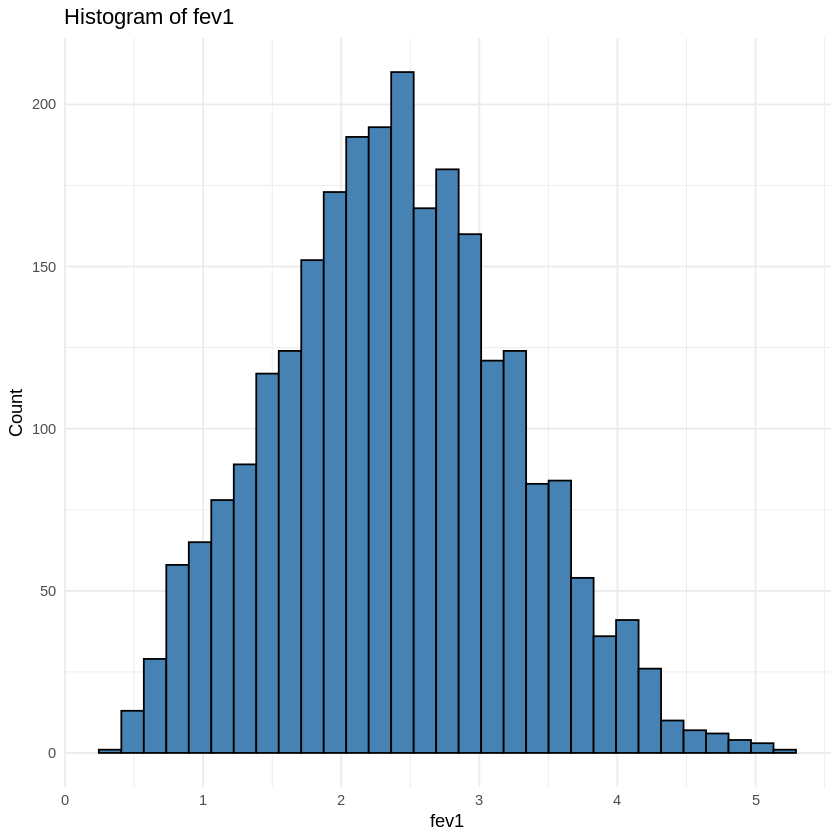

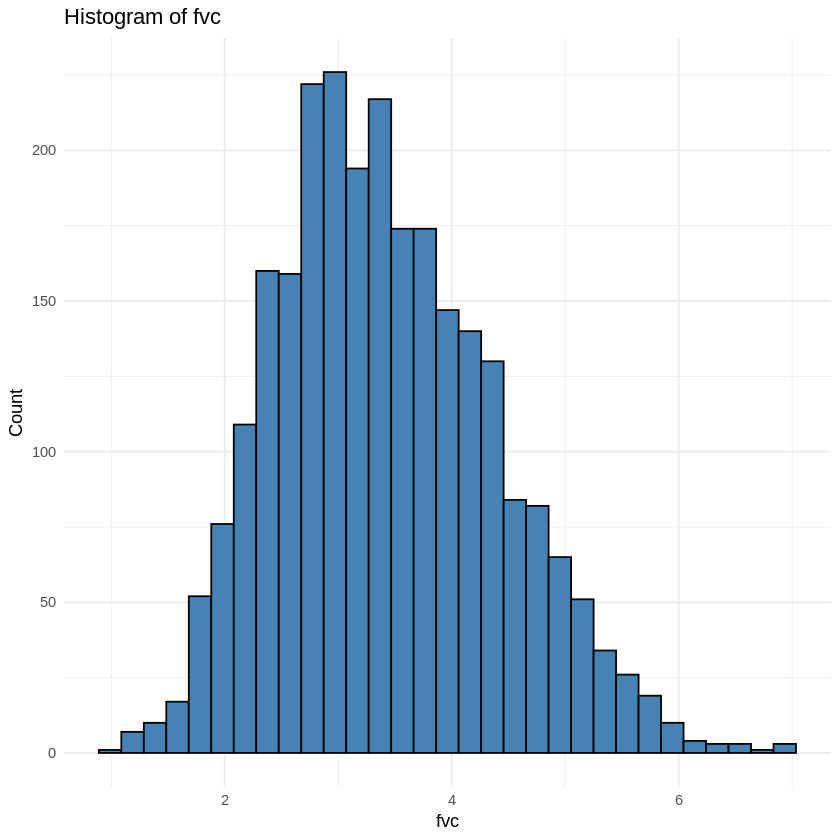

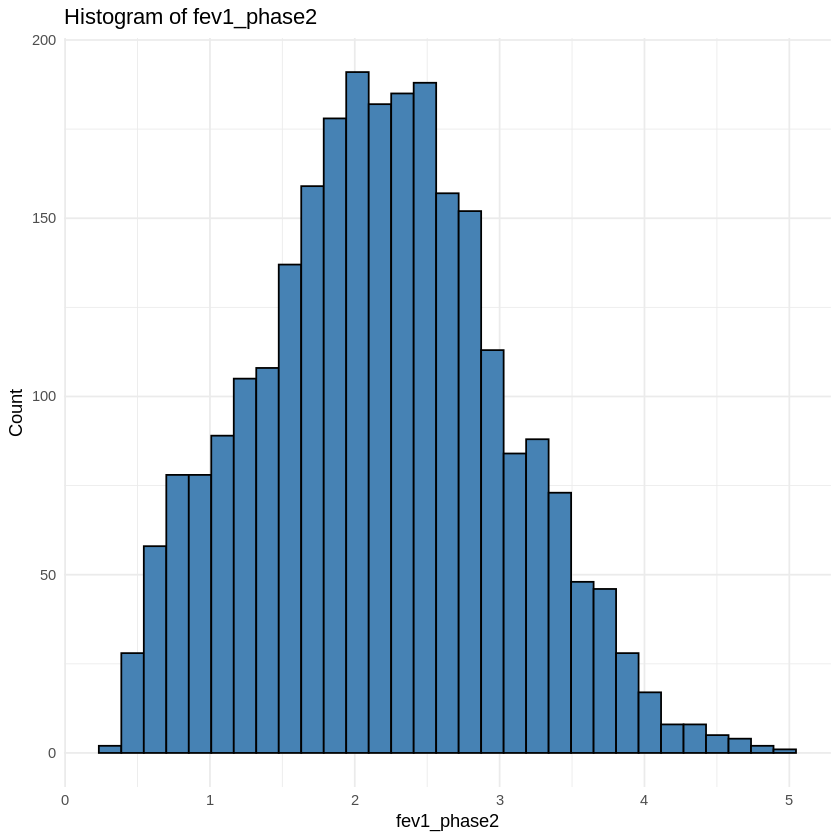

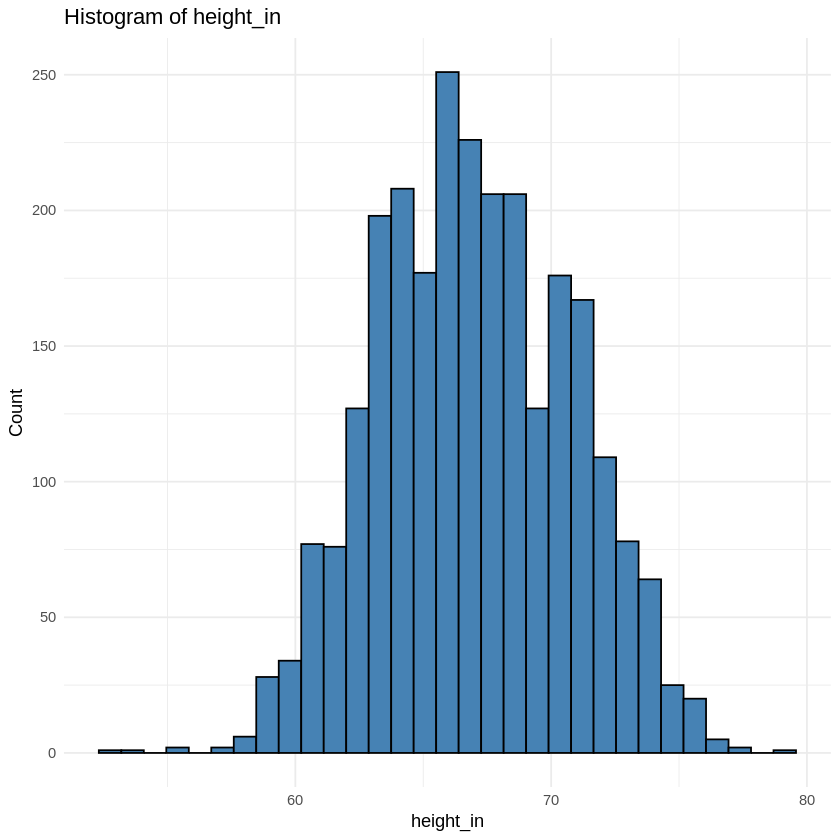

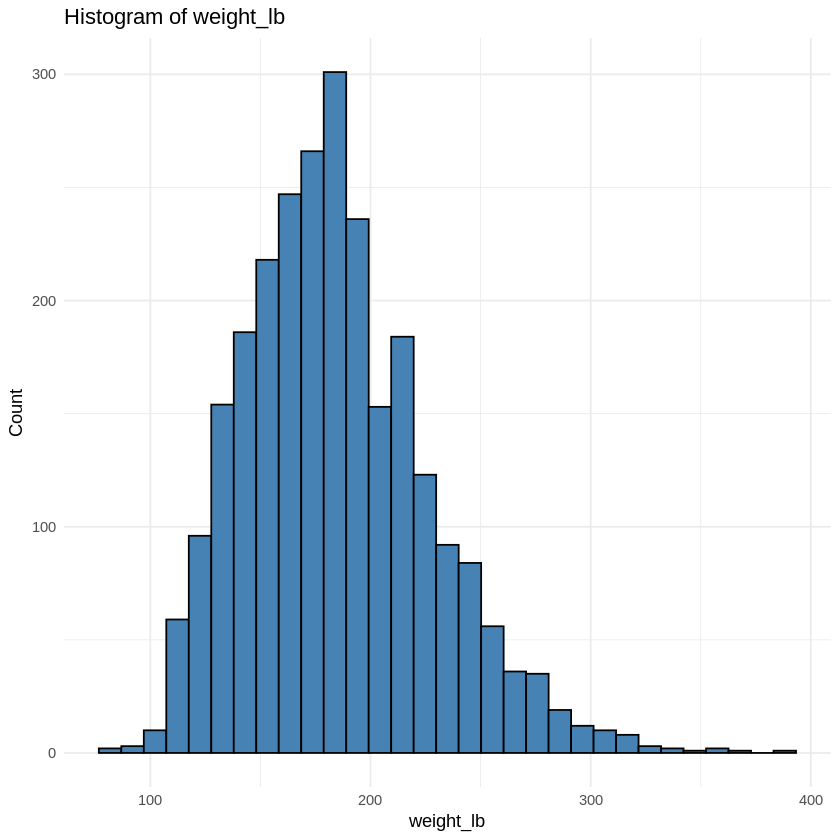

In [18]:
# 10.1
# Identify num and int
numeric_vars <- names(copd_data)[sapply(copd_data, function(x) is.numeric(x) || is.integer(x))]


# Loop and compute a binwidth = (max – min) / 30 for each variable
for (var in numeric_vars) {
  # compute range and binwidth
  vals   <- copd_data[[var]]
  rng    <- range(vals, na.rm = TRUE)
  bw     <- (rng[2] - rng[1]) / 30

  # plot
  p <- ggplot(copd_data, aes_string(x = var)) +
    geom_histogram(binwidth = bw, fill = "steelblue", color = "black") +
    labs(
      title = paste("Histogram of", var),
      x     = var,
      y     = "Count"
    ) +
    theme_minimal()
  print(p)
}


**Task 10.2**<br>
Are there any variables that are highly skewed? If so, transform these variables using an appropriate transformation.

* There seems to be quite a few variables that are highly sqwed.
* We observed : blood_pressure_systolic, heart_rate,bmi, smoke_start_age, cigs_per_day_avg, lung_volume_inspiratory, emphysema_percentage,lung_volume_expiratory, gas_trapping_percentage,fvc,fev1_phase2, height_in, weight_lb

* We treated them to a log transformation

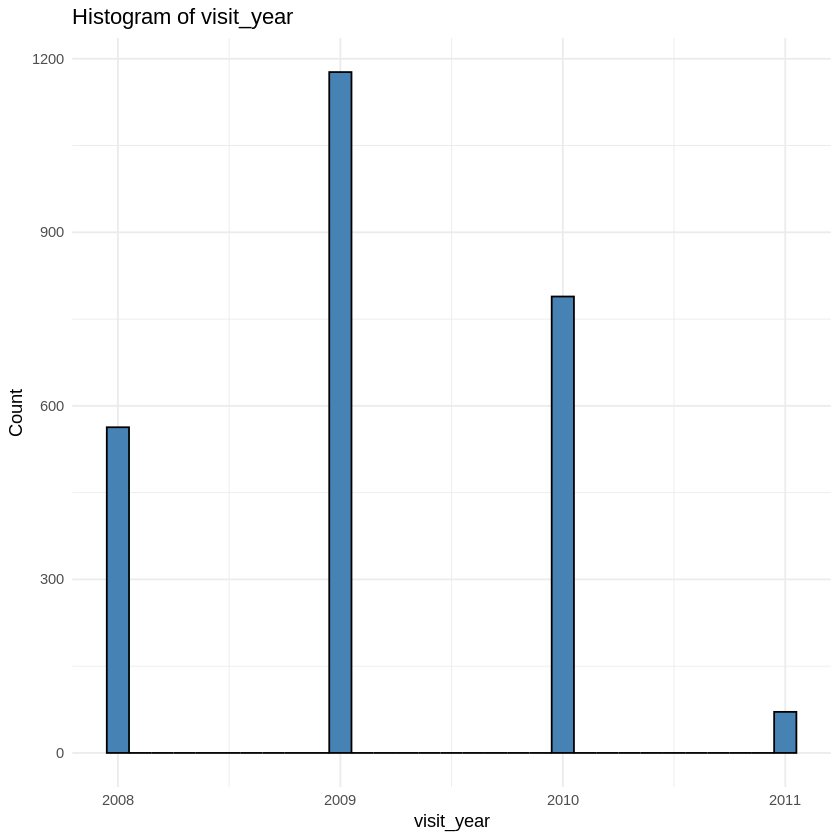

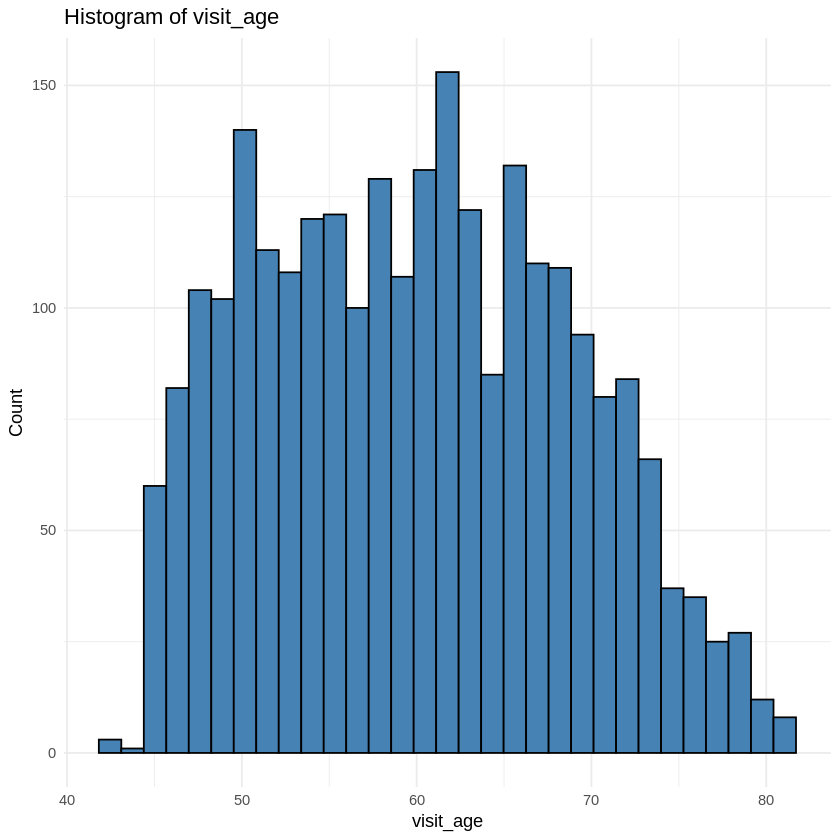

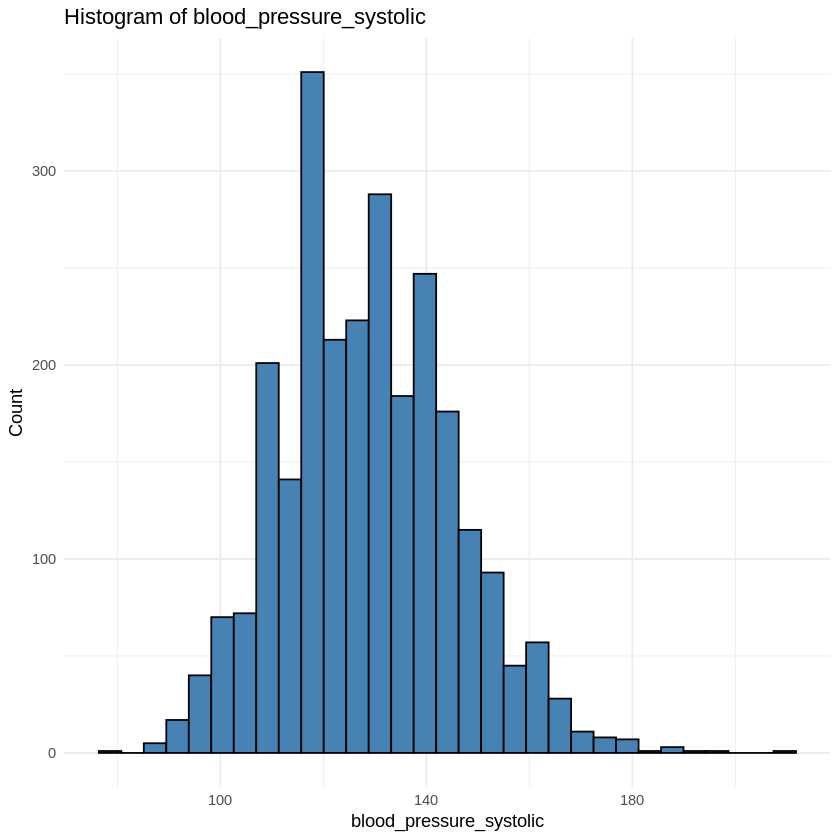

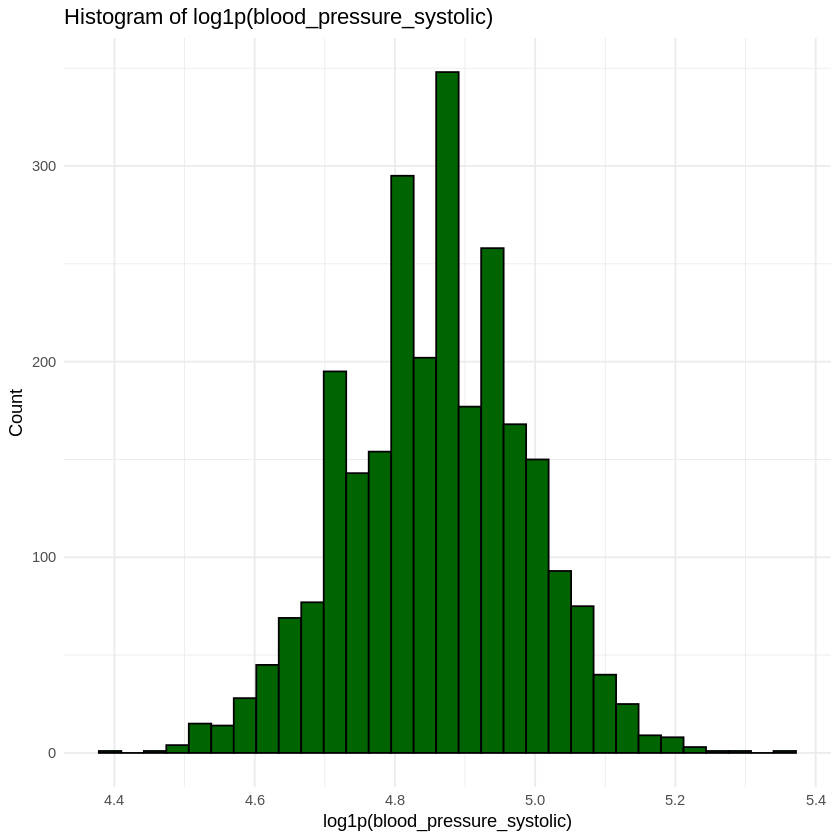

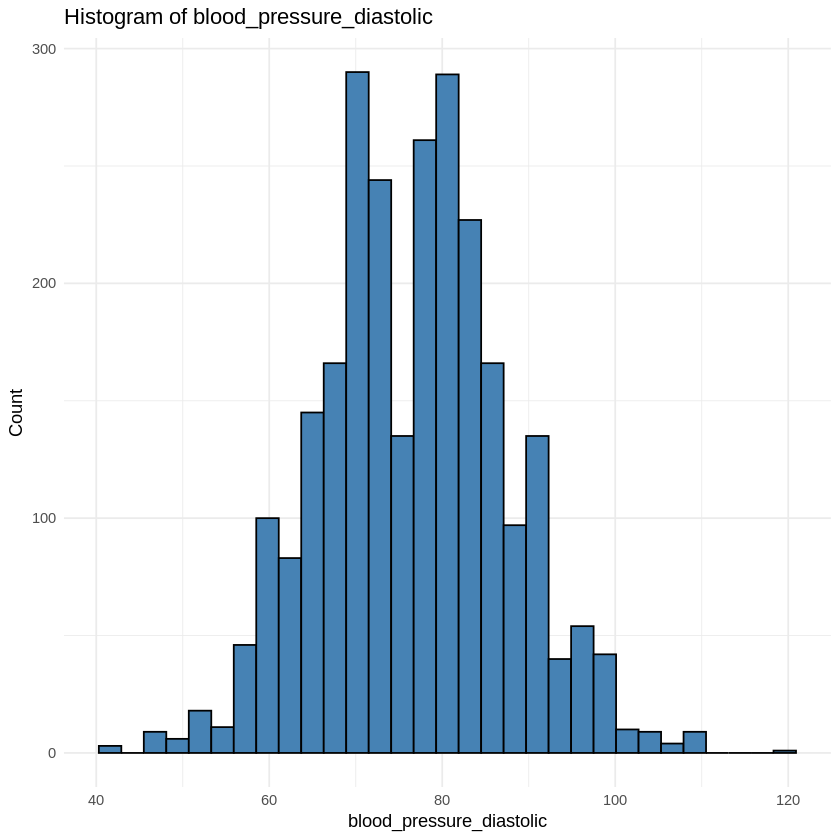

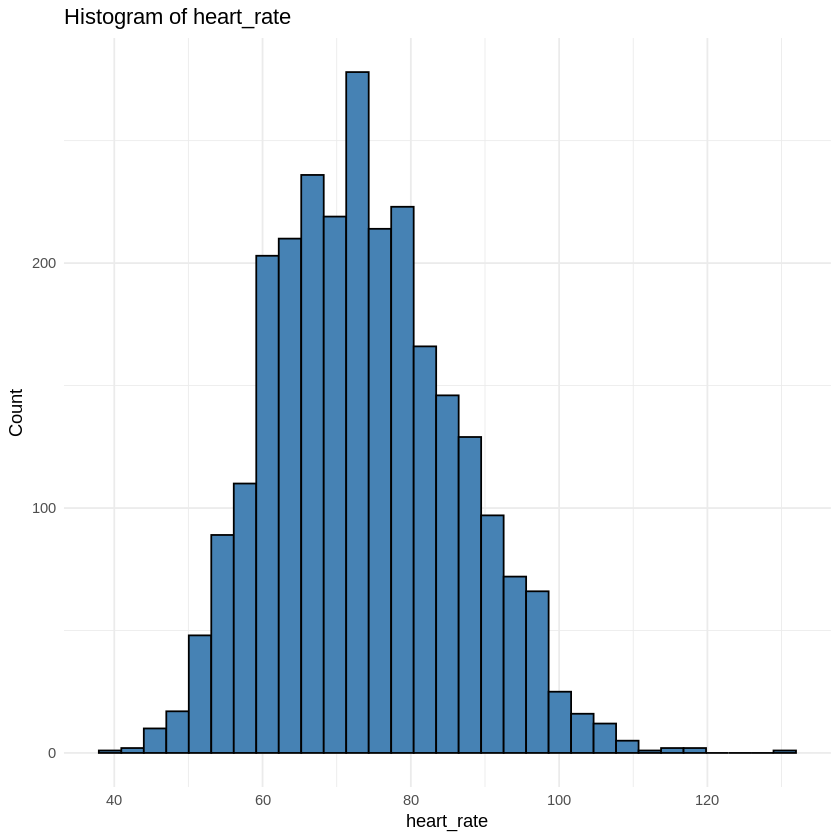

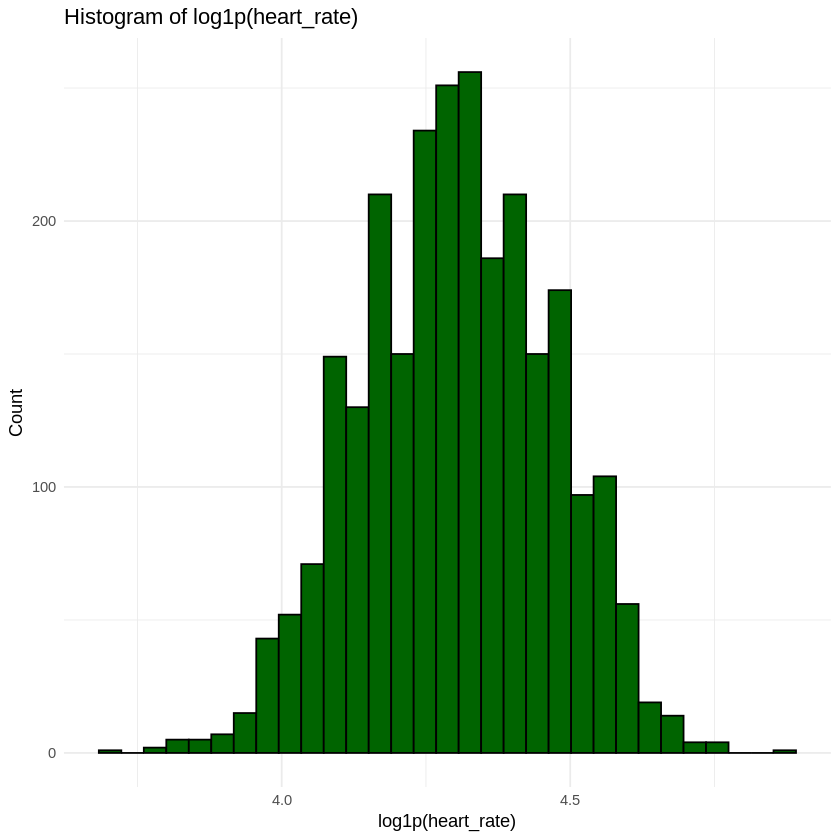

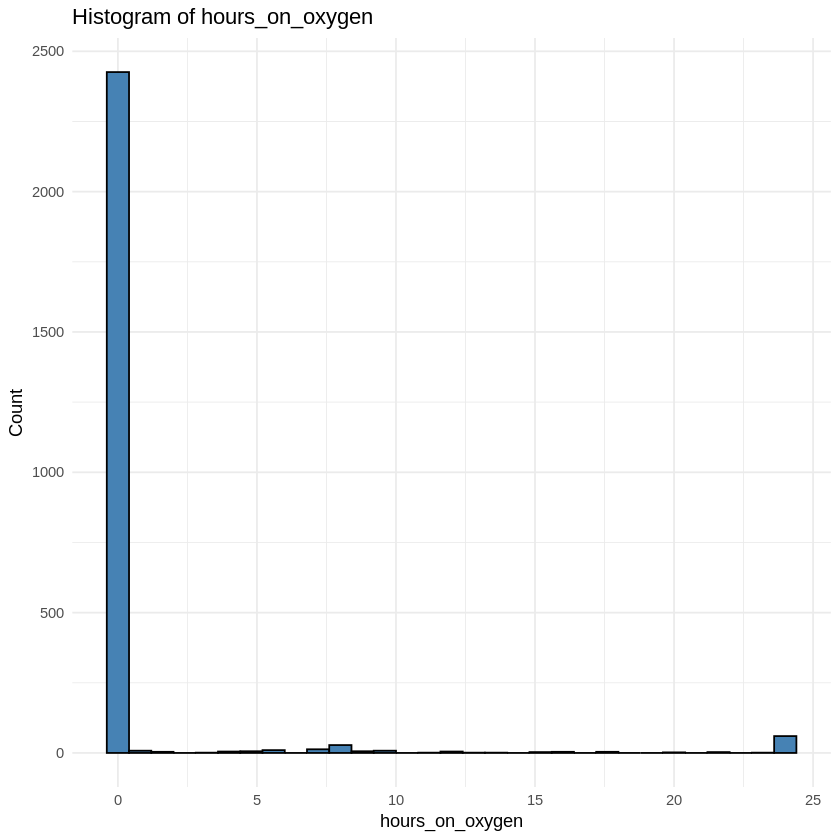

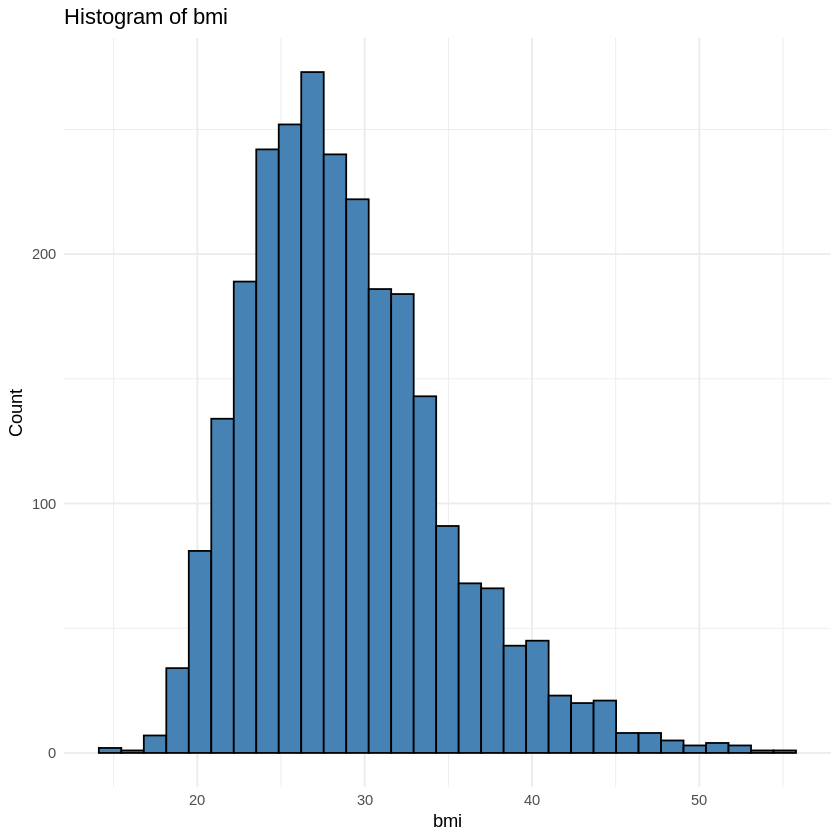

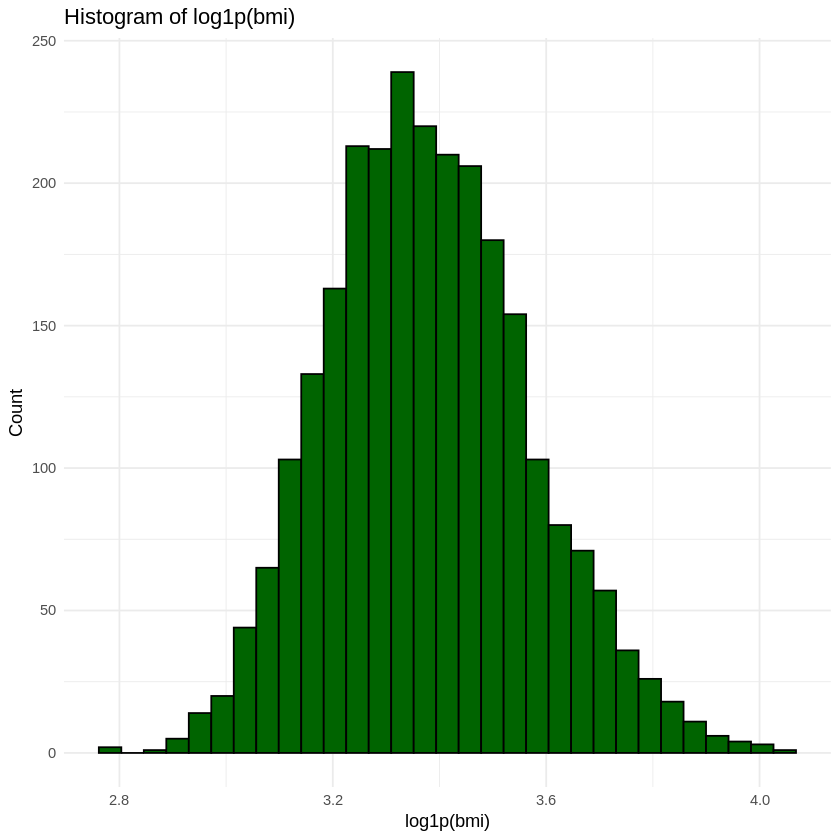

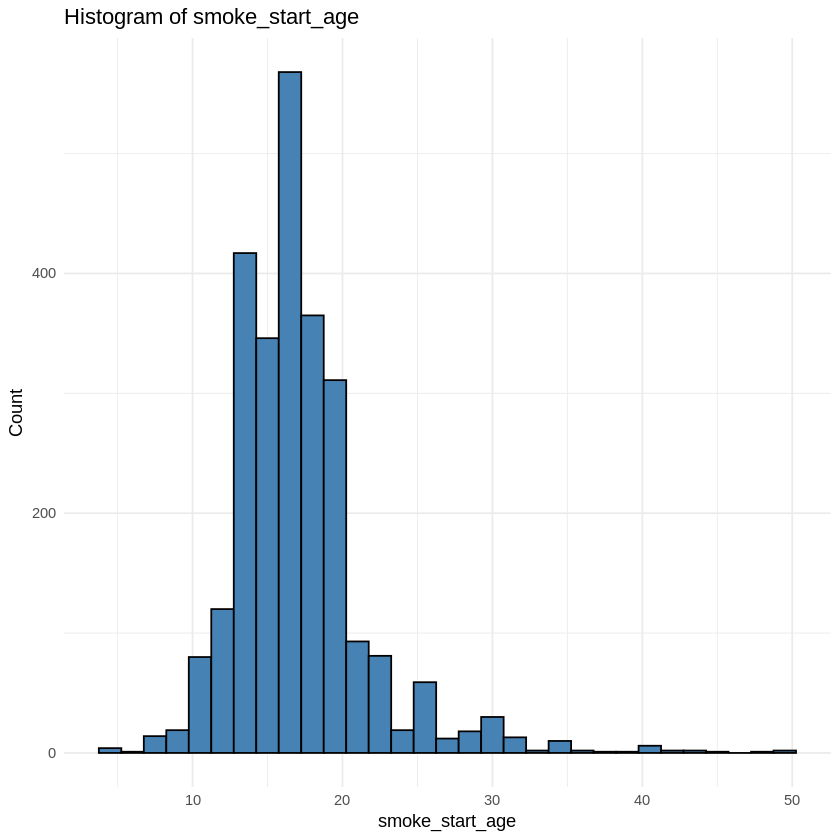

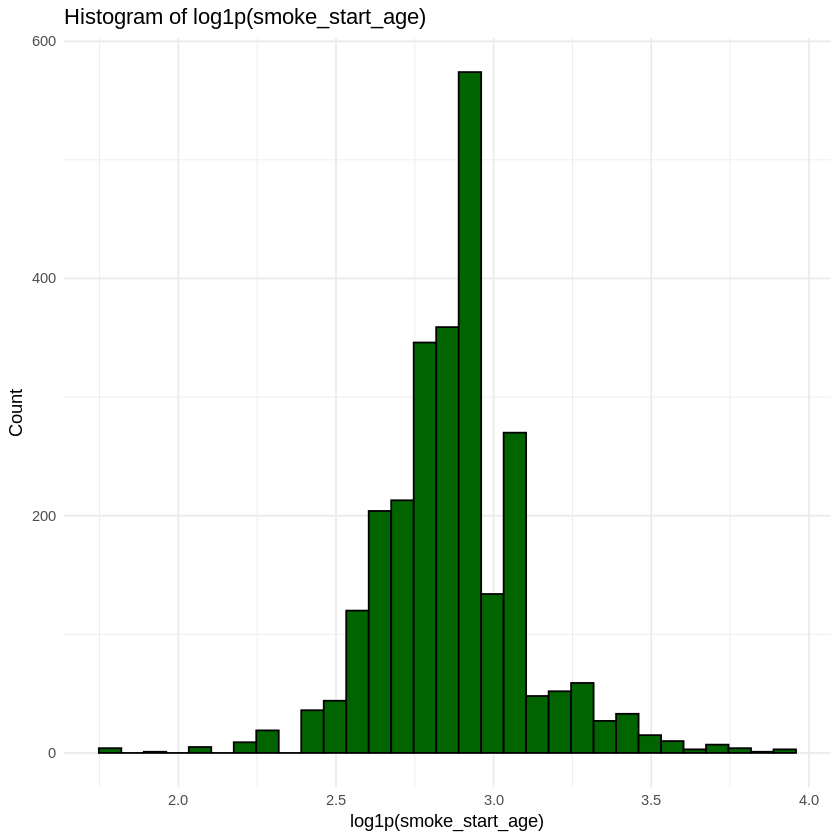

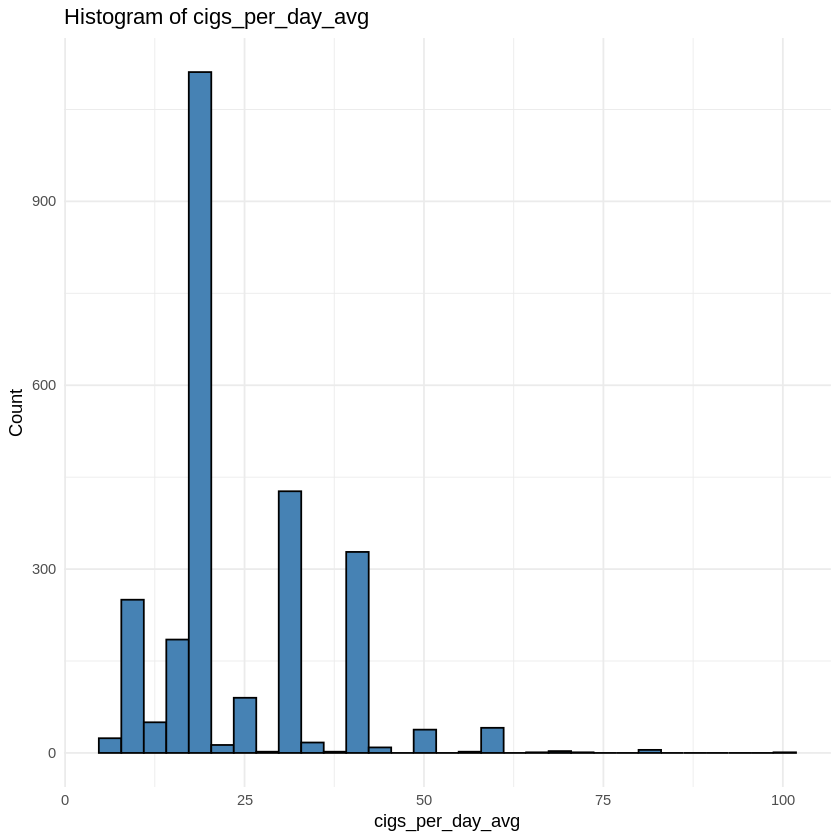

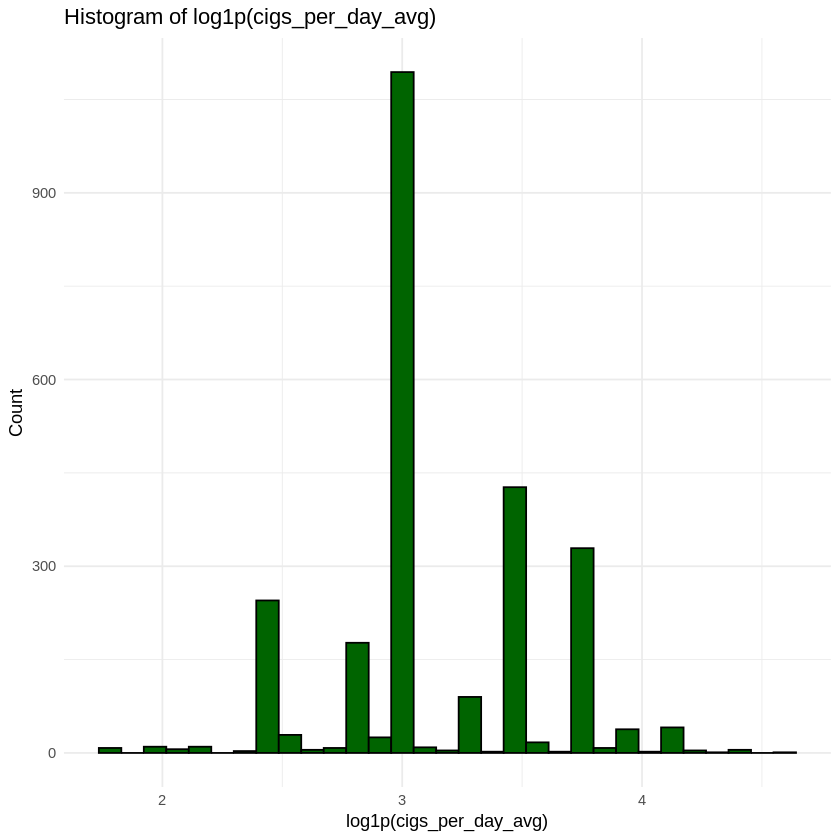

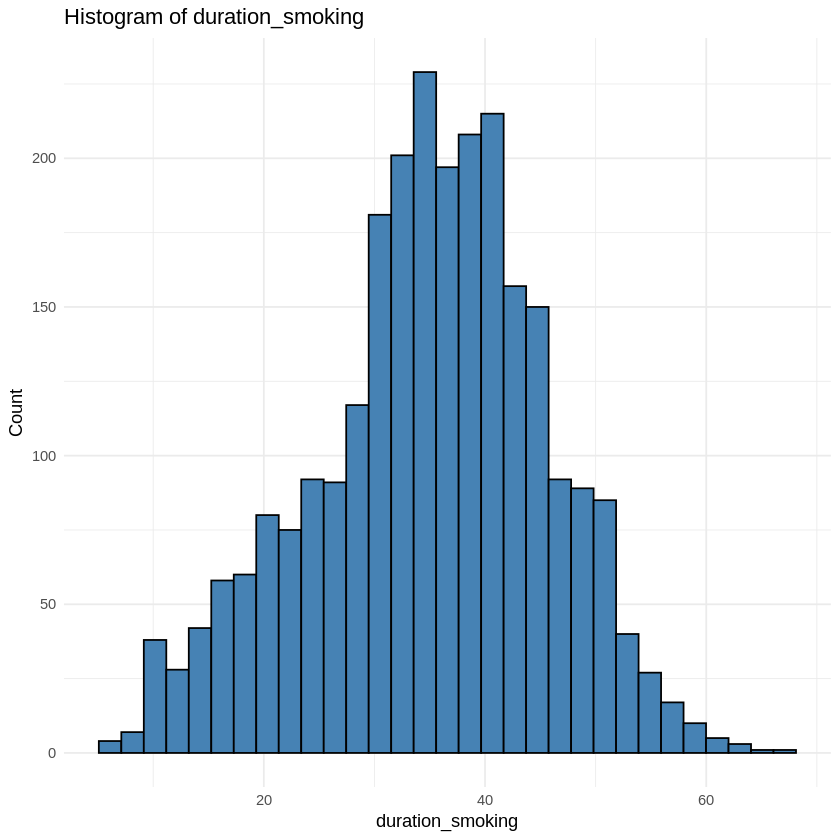

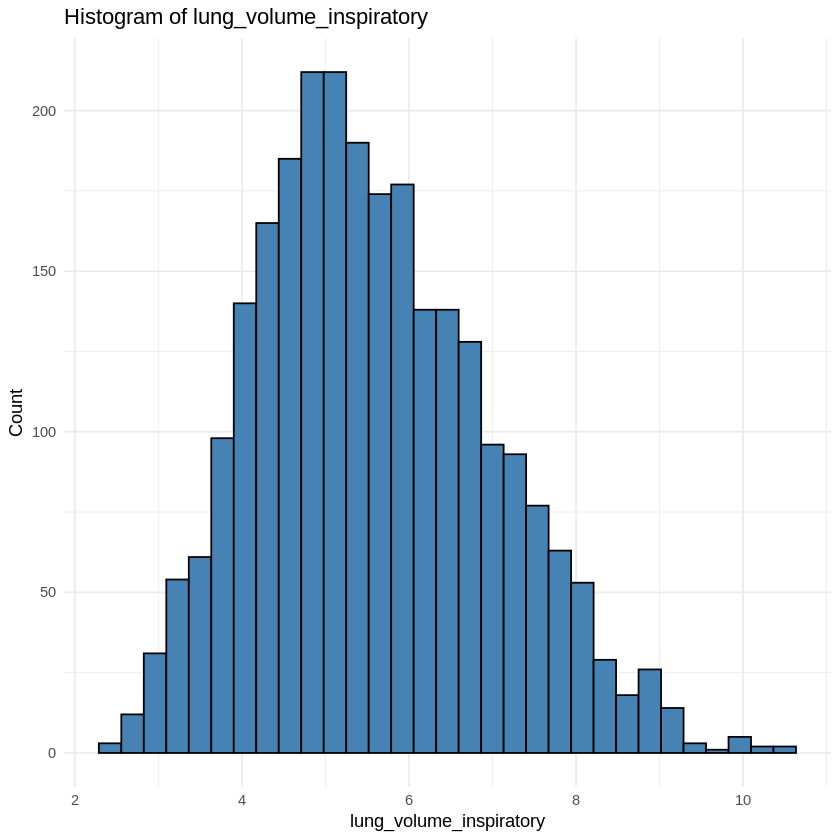

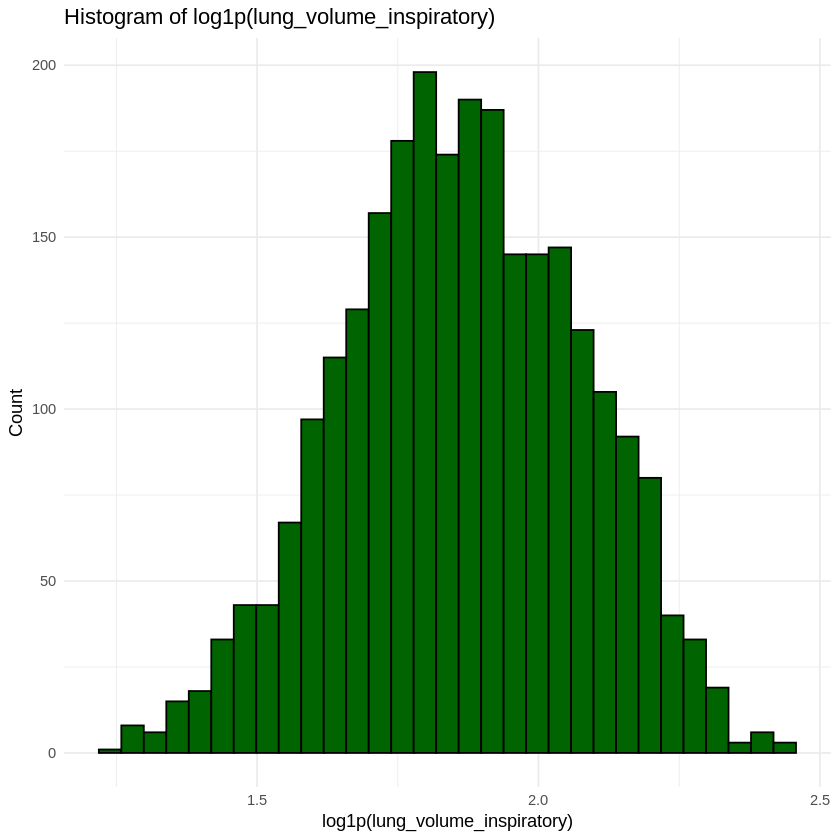

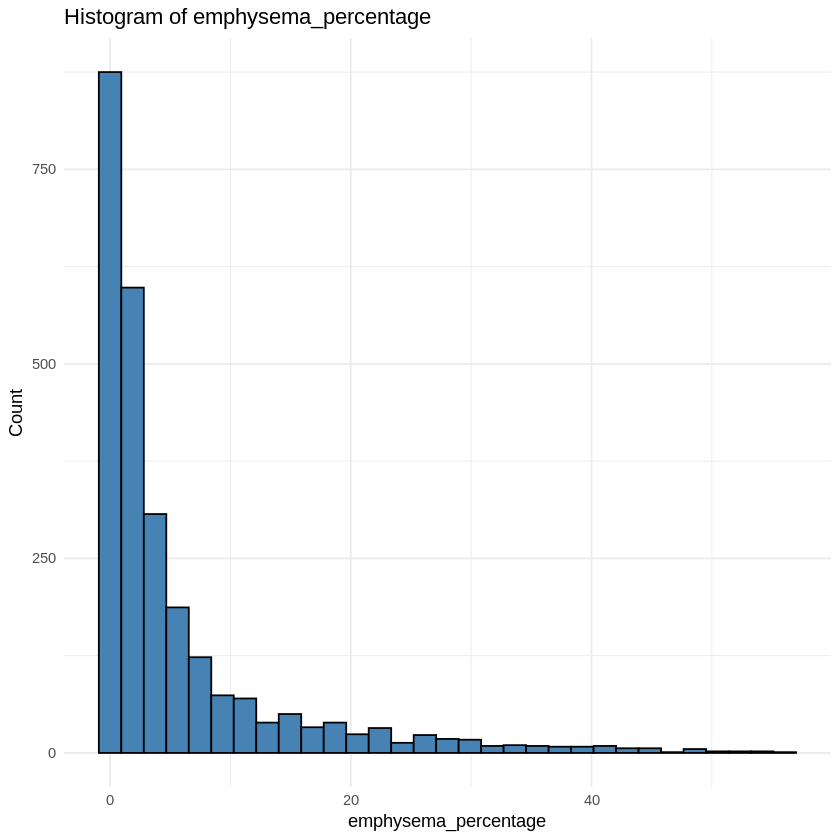

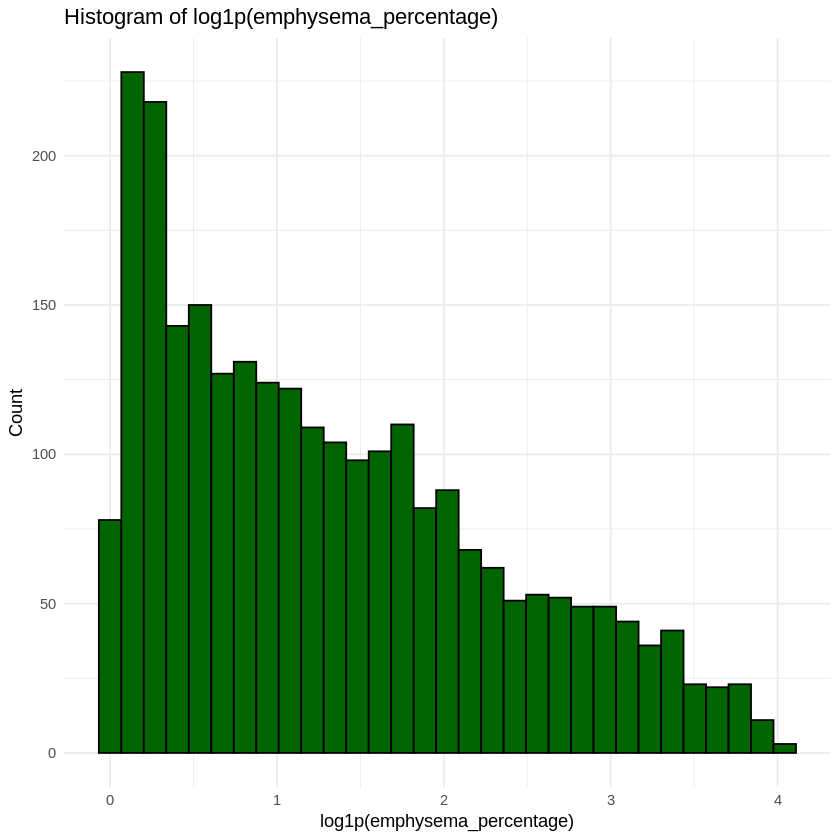

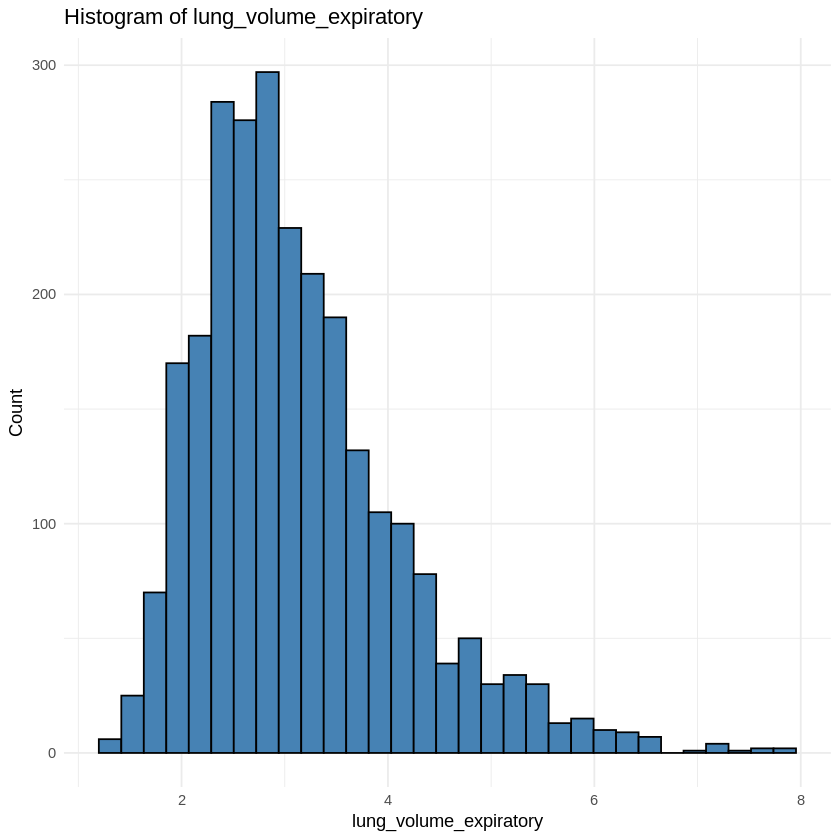

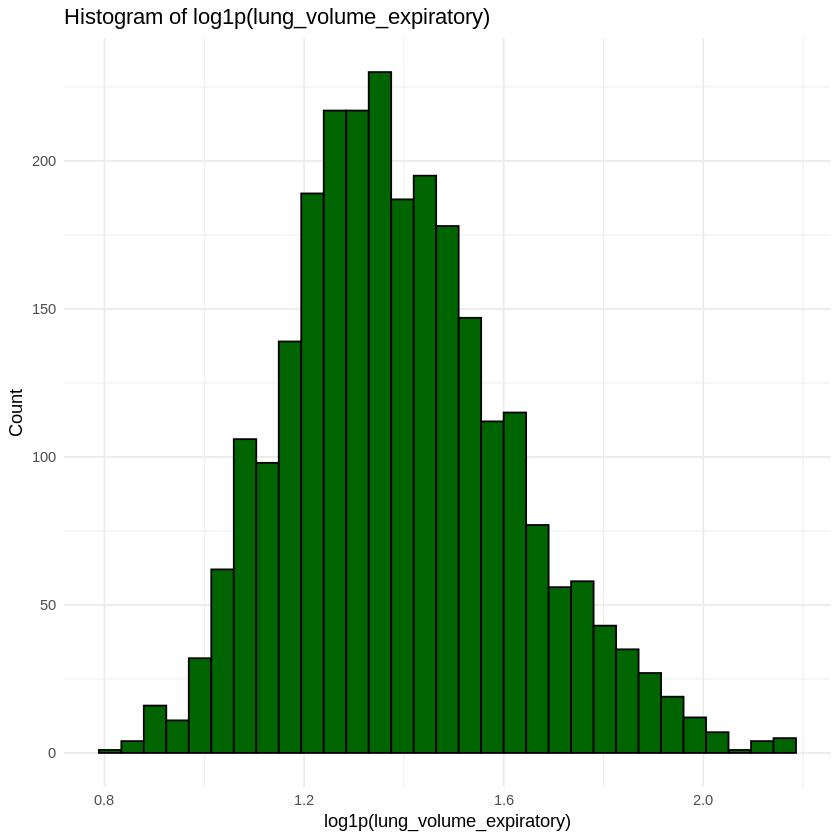

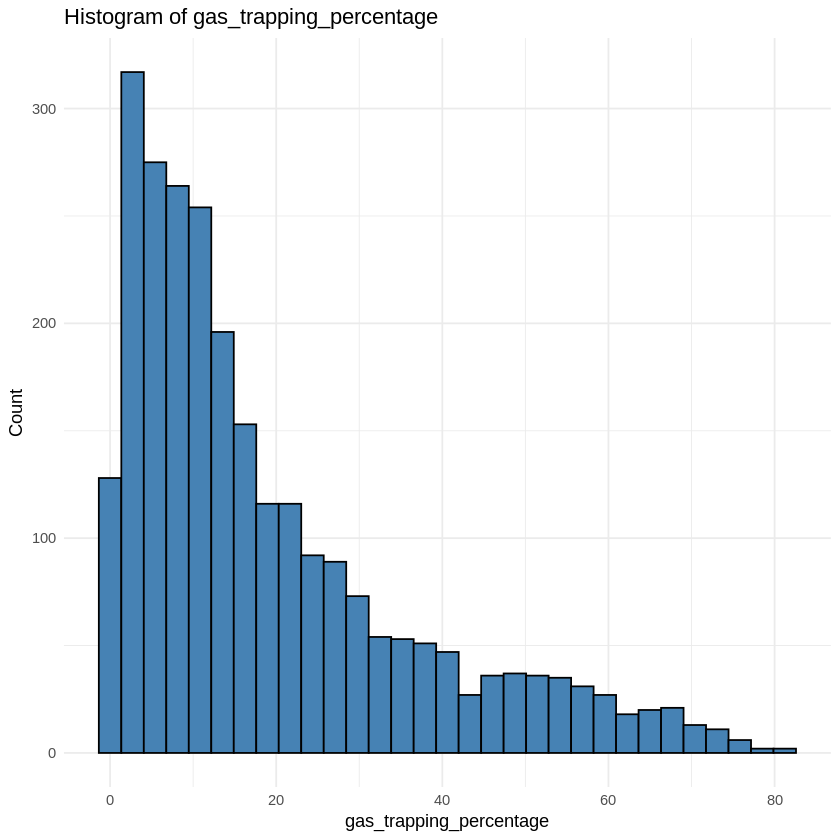

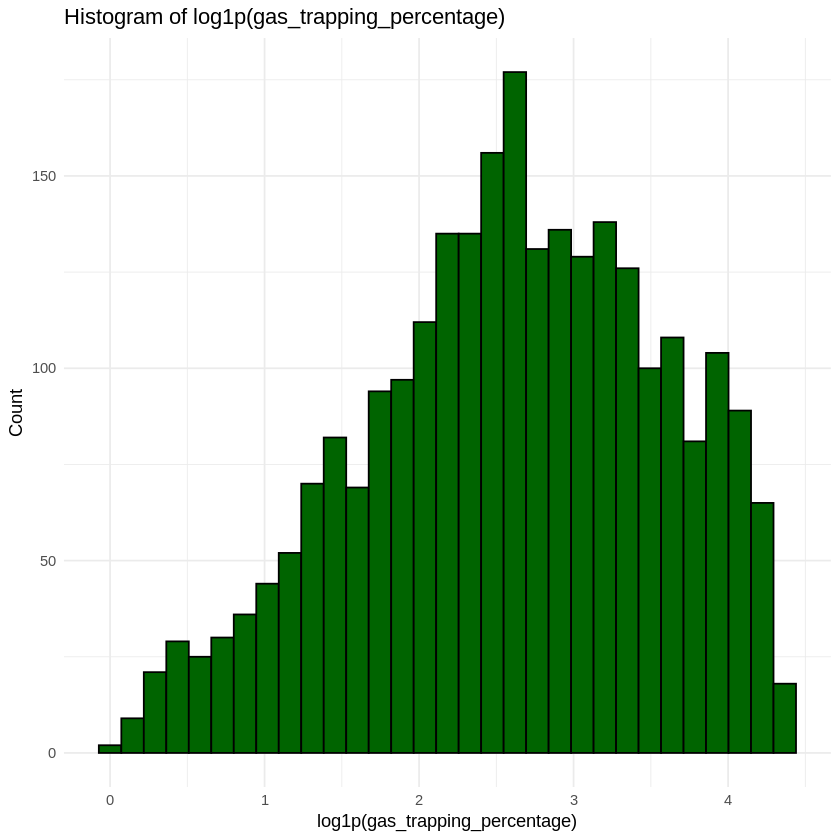

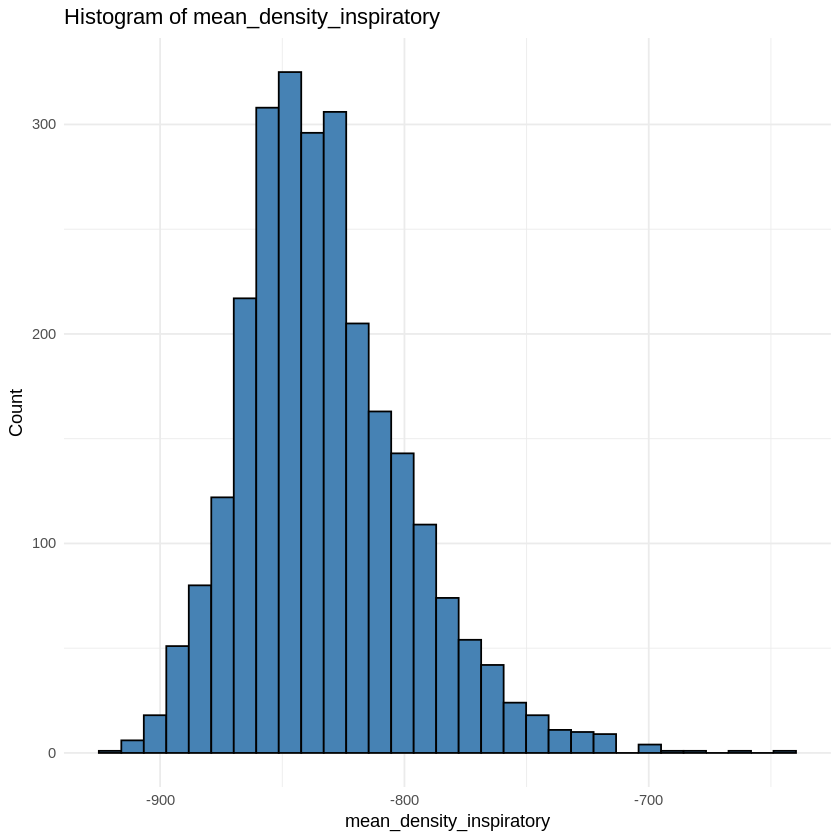

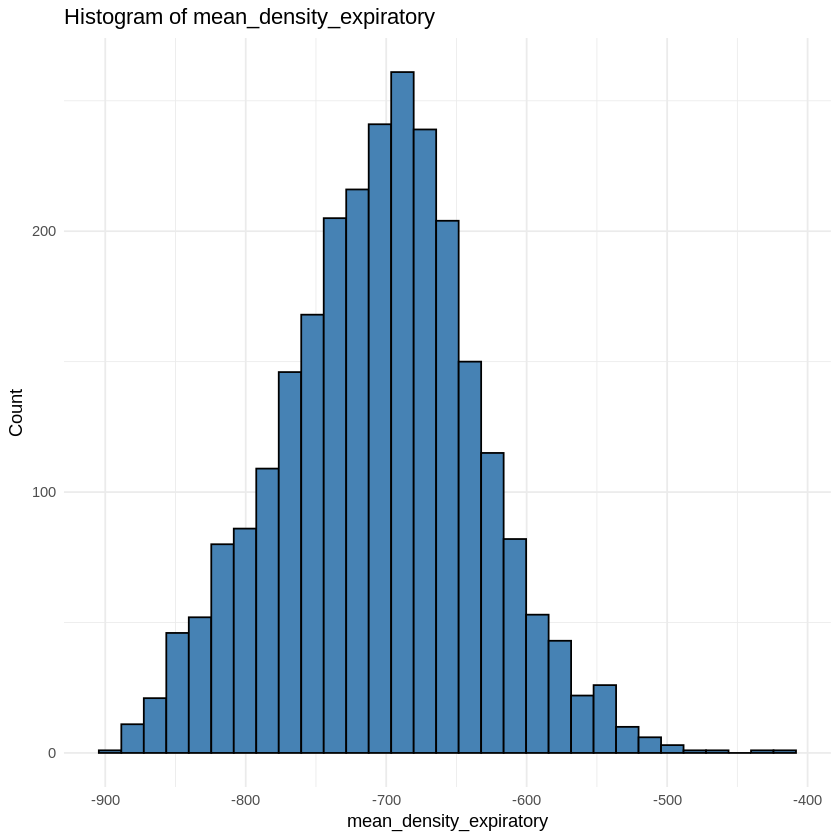

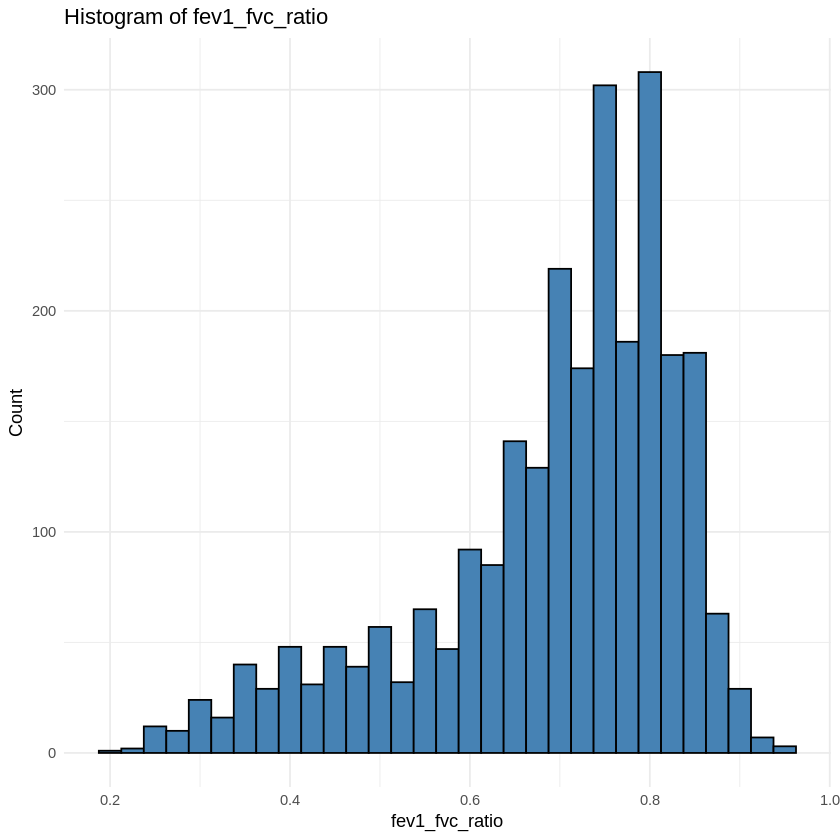

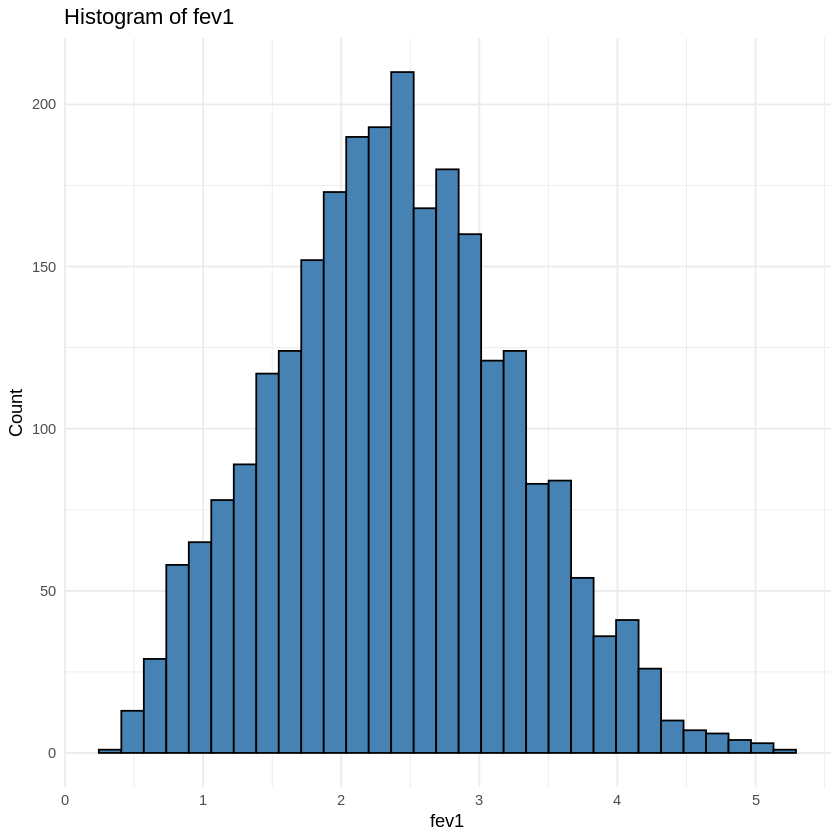

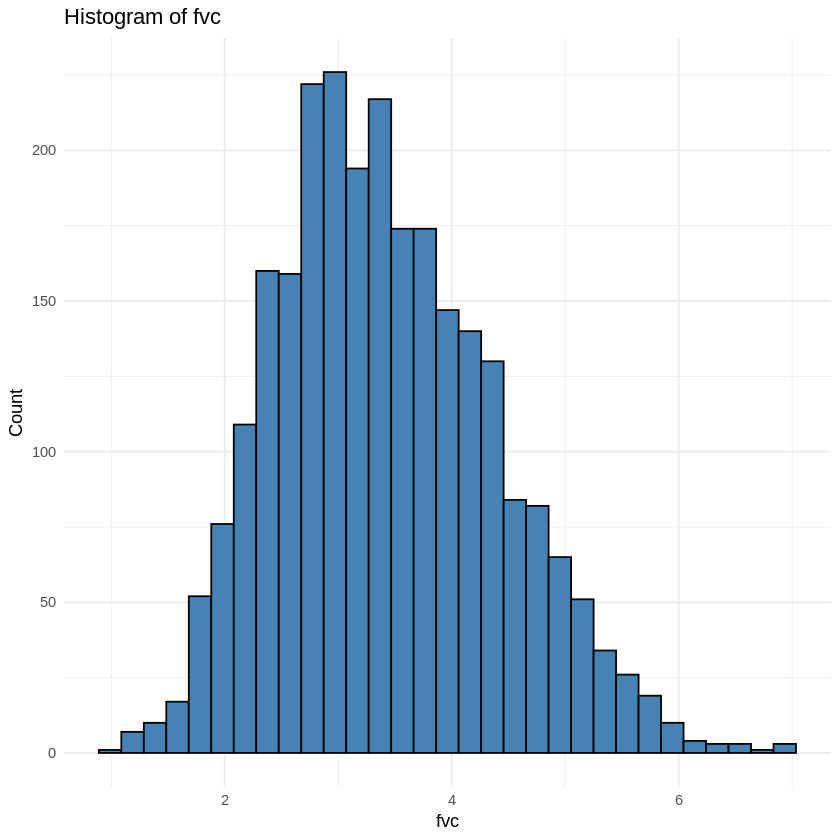

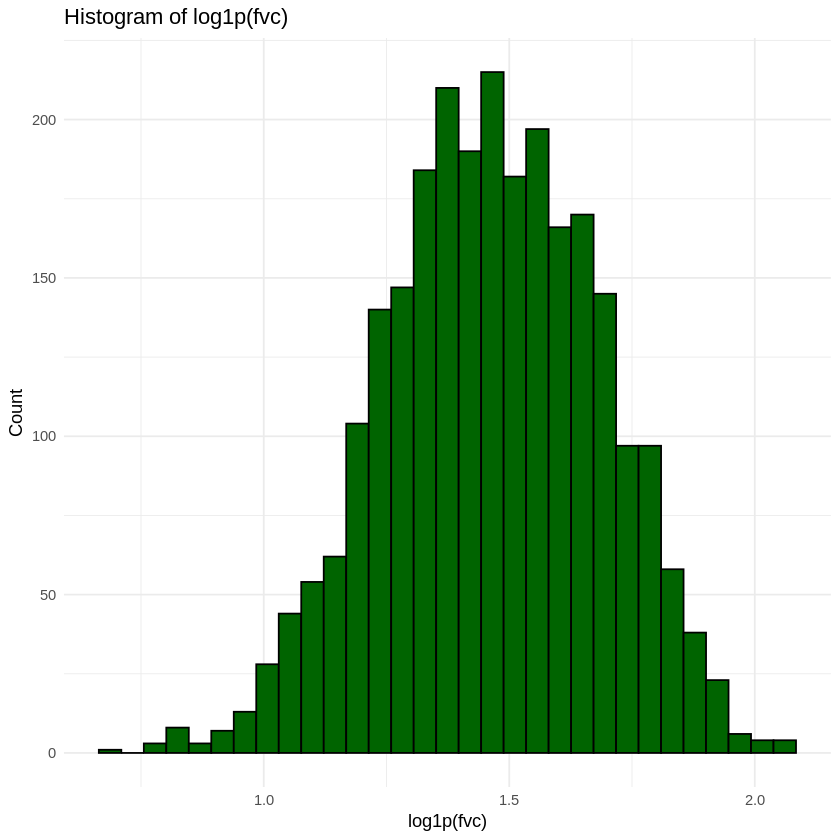

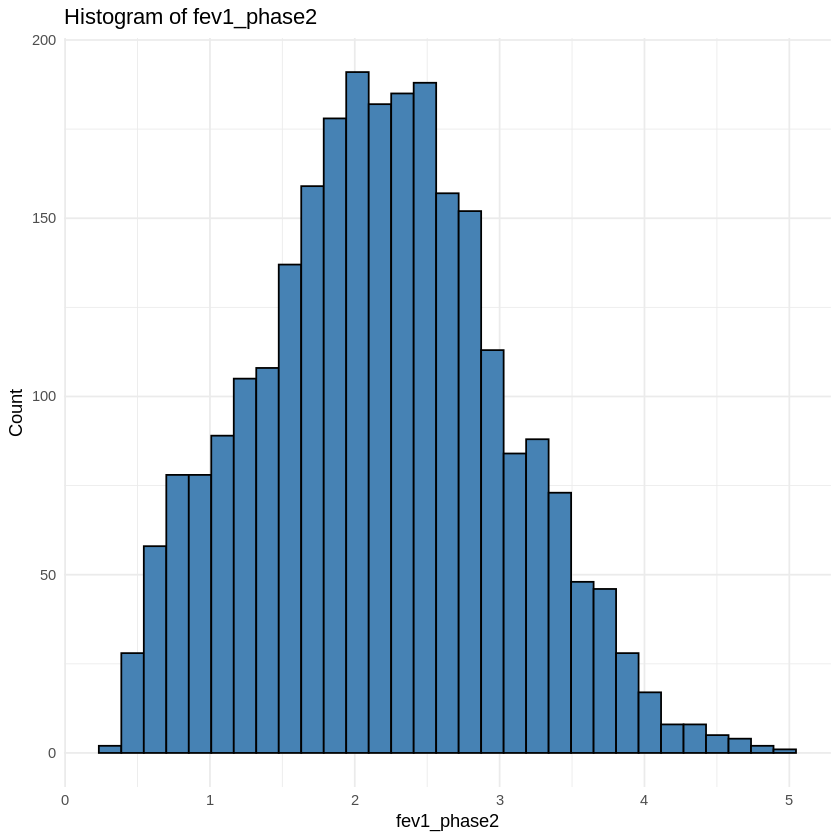

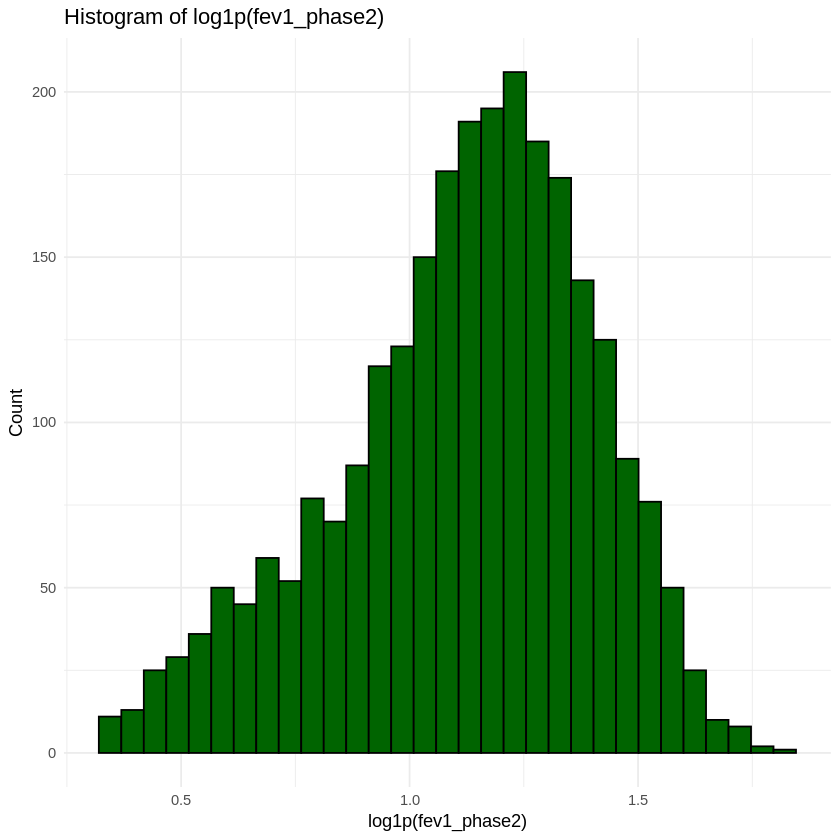

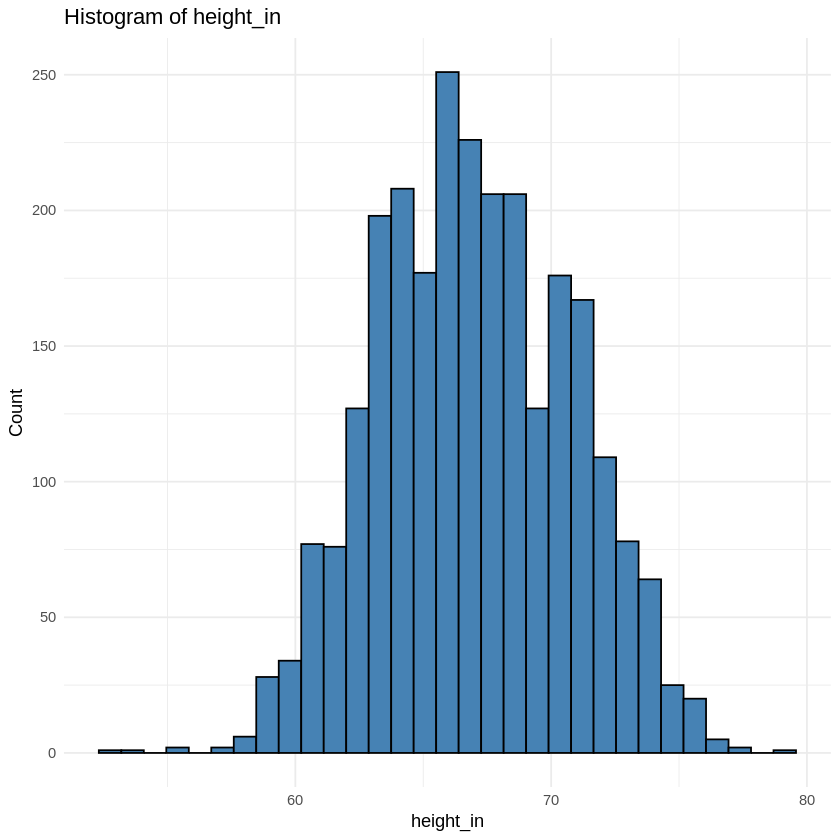

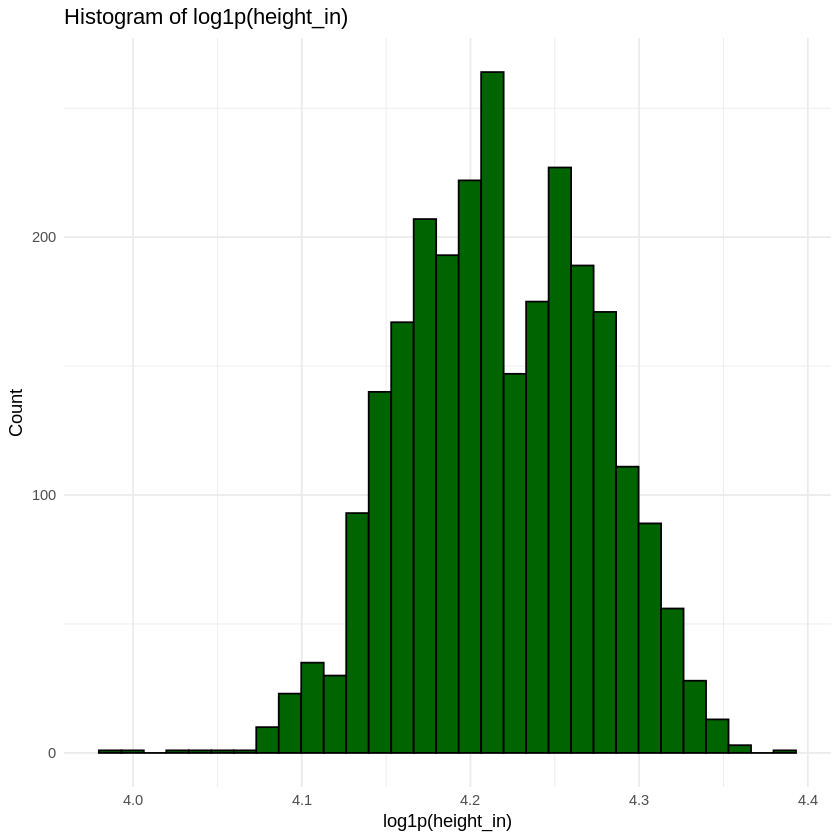

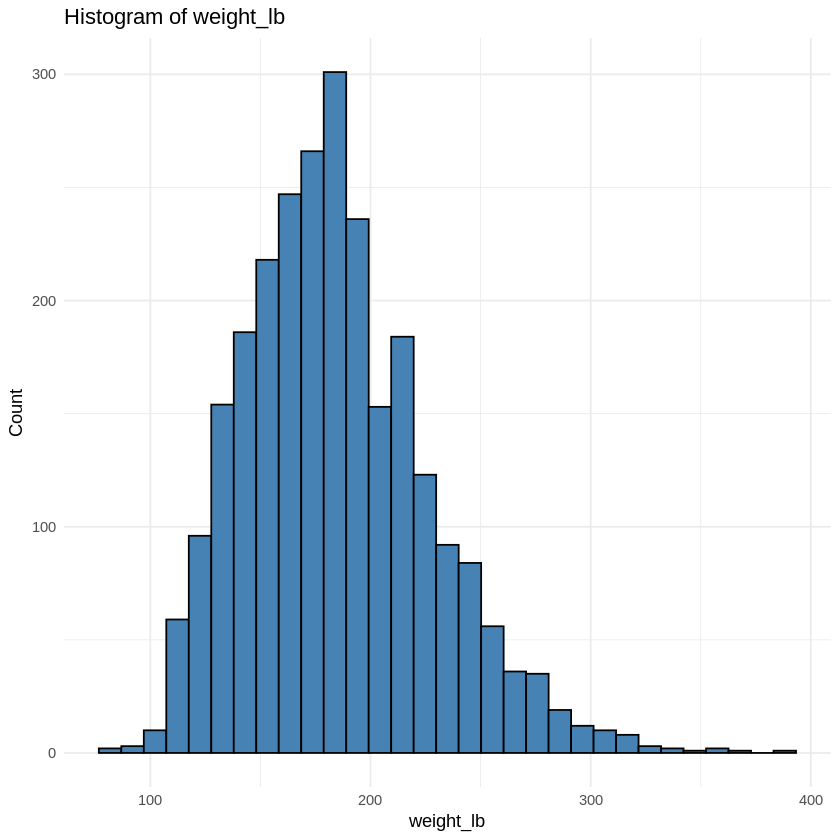

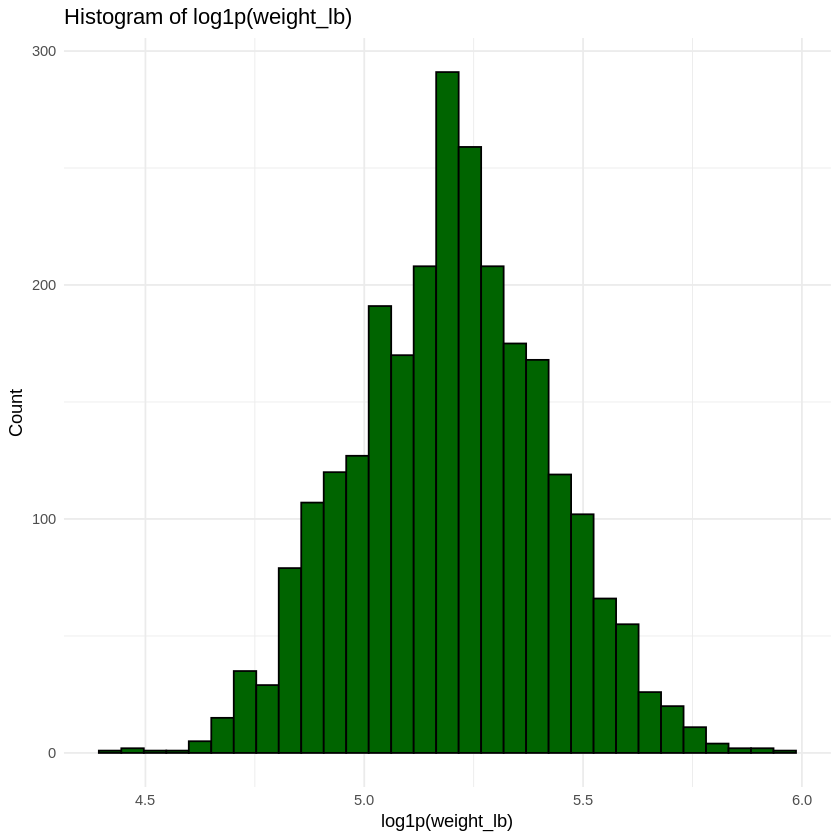

In [19]:
# 10.2 Log transformation where needed

# Loop and compute a binwidth = (max – min) / 30 for each variable
for (var in numeric_vars) {
  # compute range and binwidth for raw values
  vals <- copd_data[[var]]
  rng  <- range(vals, na.rm = TRUE)
  bw   <- (rng[2] - rng[1]) / 30

  # plot raw histogram
  p_raw <- ggplot(copd_data, aes_string(x = var)) +
    geom_histogram(binwidth = bw, fill = "steelblue", color = "black") +
    labs(
      title = paste("Histogram of", var),
      x     = var,
      y     = "Count"
    ) +
    theme_minimal()
  print(p_raw)

  # check each skewed variable explicitly
    if (var == "blood_pressure_systolic" ||
        var == "heart_rate" ||
        var == "bmi" ||
        var == "smoke_start_age" ||
        var == "cigs_per_day_avg" ||
        var == "lung_volume_inspiratory" ||
        var == "emphysema_percentage" ||
        var == "lung_volume_expiratory" ||
        var == "gas_trapping_percentage" ||
        var == "fvc" ||
        var == "fev1_phase2" ||
        var == "height_in" ||
        var == "weight_lb") {

    # compute log1p transform
    log_vals <- log1p(vals)
    rng_log  <- range(log_vals, na.rm = TRUE)
    bw_log   <- (rng_log[2] - rng_log[1]) / 30

    # plot transformed histogram
    df_log <- data.frame(log_vals)
    p_log <- ggplot(df_log, aes(x = log_vals)) +
      geom_histogram(binwidth = bw_log, fill = "darkgreen", color = "black") +
      labs(
        title = paste("Histogram of log1p(", var, ")", sep = ""),
        x     = paste("log1p(", var, ")", sep = ""),
        y     = "Count"
      ) +
      theme_minimal()

    print(p_log)
    }

}



<br>

<br>

<br>

---

<br>






####<font color=red>Task 11</font>

We are primarily interested in the breathing function of the clinical trial participants after five years (`fev1_phase2`).

Using `ggplot` covered in the course,

1. Visualize the relationship between `fev1_phase2` and at least five categorical variables in your data frame

2. What are your observations? Based on your data visualizations, do there appear to be any differences in `fev1_phase2` between groups?

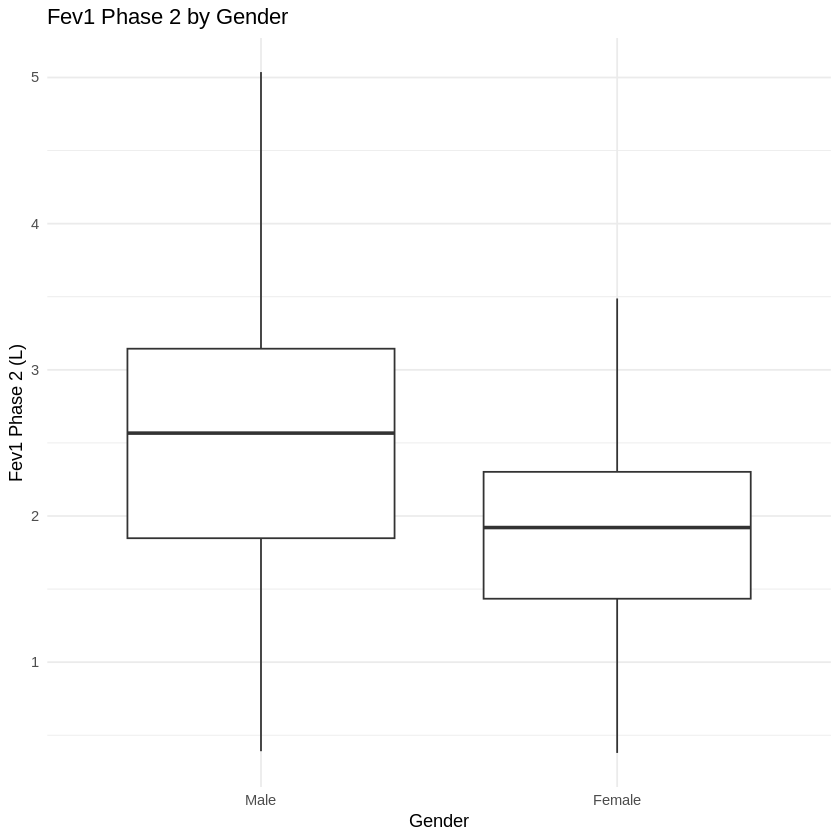

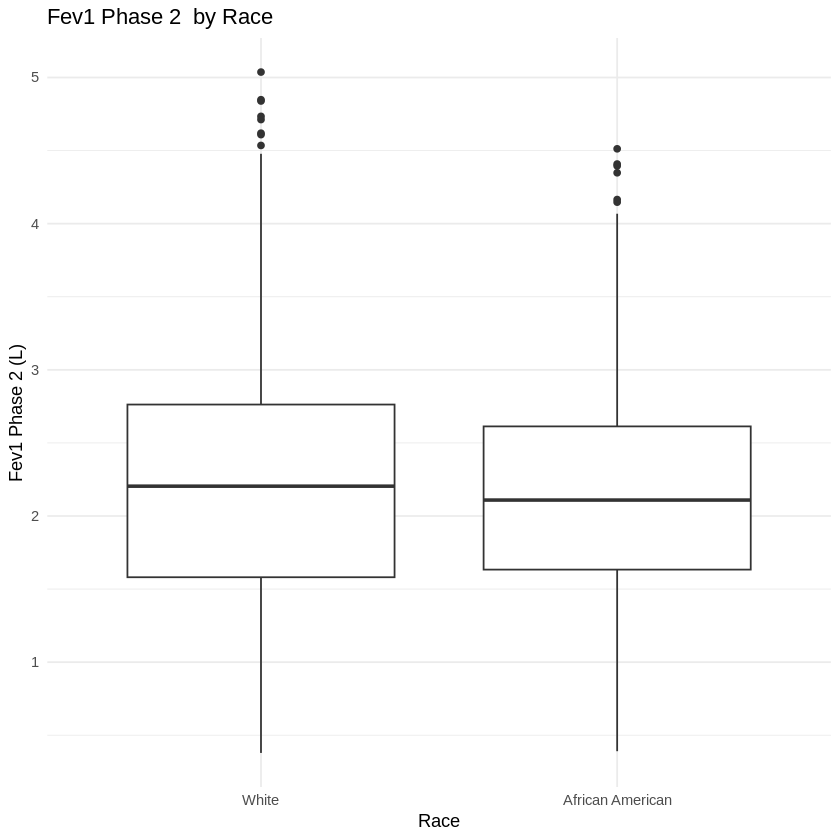

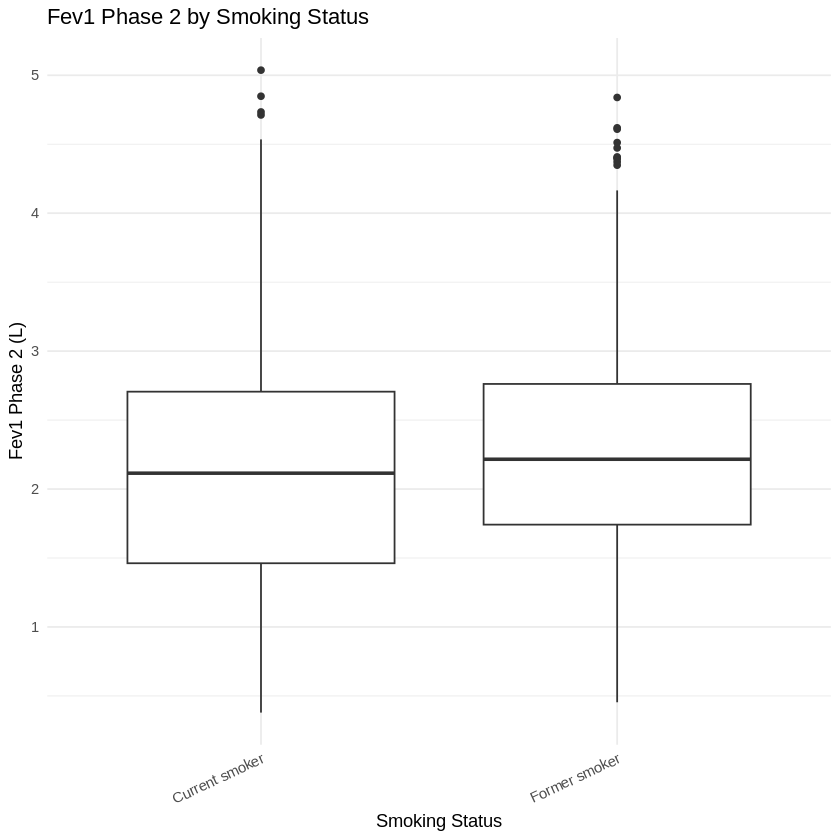

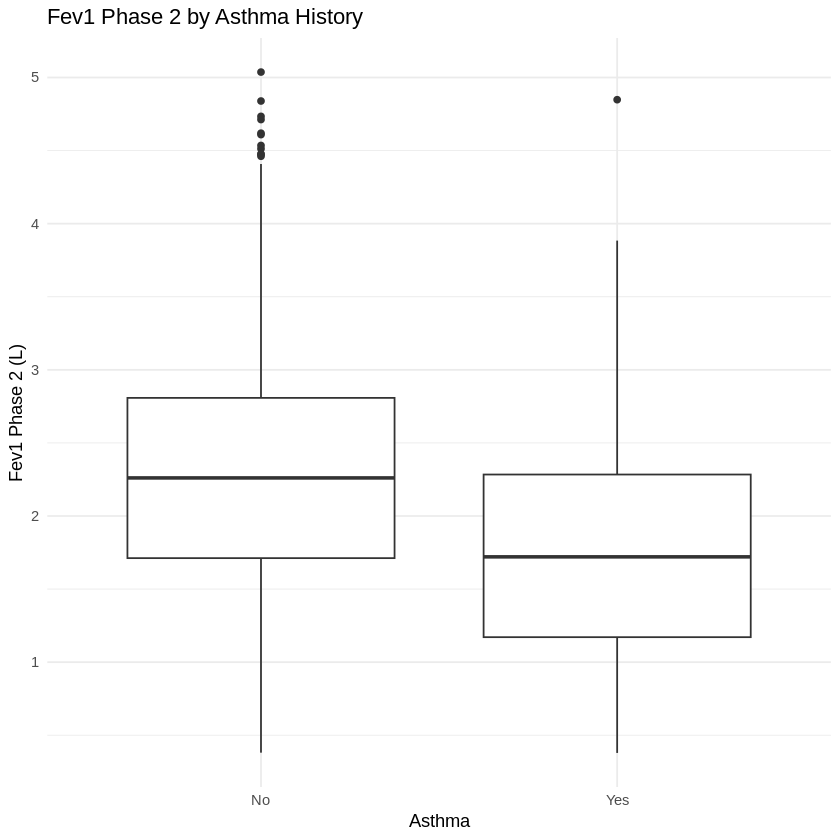

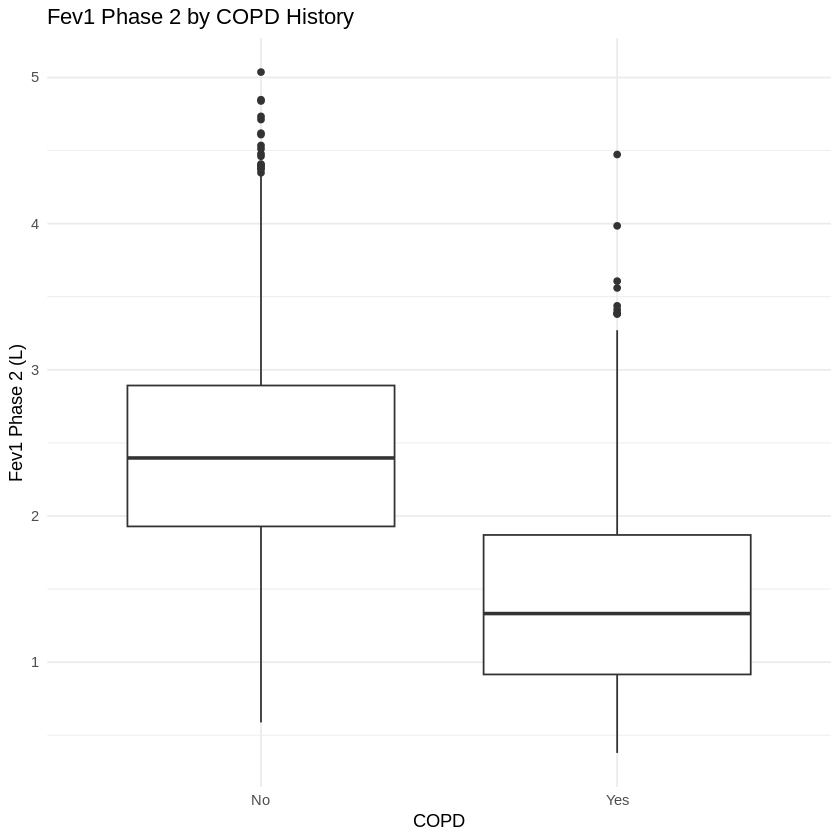

In [20]:
# 11.1 Visual Fev1 Phase 2 vs. five categorical variables

# 1) Gender
ggplot(copd_data, aes(x = gender, y = fev1_phase2)) +
  geom_boxplot() +
  labs(
    title = "Fev1 Phase 2 by Gender",
    x     = "Gender",
    y     = "Fev1 Phase 2 (L)"
  ) +
  theme_minimal()

# 2) Race
ggplot(copd_data, aes(x = race, y = fev1_phase2)) +
  geom_boxplot() +
  labs(
    title = "Fev1 Phase 2  by Race",
    x     = "Race",
    y     = "Fev1 Phase 2 (L)"
  ) +
  theme_minimal()

# 3) Smoking Status
ggplot(copd_data, aes(x = smoking_status, y = fev1_phase2)) +
  geom_boxplot() +
  labs(
    title = "Fev1 Phase 2 by Smoking Status",
    x     = "Smoking Status",
    y     = "Fev1 Phase 2 (L)"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 25, hjust = 1))

# 4) Asthma History
ggplot(copd_data, aes(x = asthma, y = fev1_phase2)) +
  geom_boxplot() +
  labs(
    title = "Fev1 Phase 2 by Asthma History",
    x     = "Asthma",
    y     = "Fev1 Phase 2 (L)"
  ) +
  theme_minimal()

# 5) COPD History
ggplot(copd_data, aes(x = copd, y = fev1_phase2)) +
  geom_boxplot() +
  labs(
    title = "Fev1 Phase 2 by COPD History",
    x     = "COPD",
    y     = "Fev1 Phase 2 (L)"
  ) +
  theme_minimal()


**Task 11.2** <br>

**Smoking Status**
   * **Former smokers** have a higher median FEV1 than **current smokers**.
   * Current smokers also exhibit a wider spread of low values,this  suggests a greater variability and more extreme declines.

**Asthma History**
   * Participants **without**  have a higher median FEV1 than **with** asthma.
   * The asthma‐yes group’s IQR is shifted downward.

**COPD History**
   * The most dramatic gap: those **without** COPD have a median 2.4 L, compared to the **COPD** group at 1.3 L.
   * Their IQR barely overlaps, this indicats a very strong association.

**Conclusion:**
We obesrved that there are significant differences in FEV1 at five years across all of these categories.
* The largest effects are seen for **COPD** **asthma** history and smoking behavior.
* These patterns suggest that any multivariable model of FEV₁ should adjust at least for COPD status, asthma, and smoking behavior.


<br>

<br>

<br>

---

<br>






####<font color=red>Task 12</font>

We are primarily interested in the breathing function of the clinical trial participants after five years (`fev1_phase2`).

Using `ggplot` covered in the course,

1. Visualize the relationship between `fev1_phase2` and at least ***five*** numeric variables in your data frame

2. What are your observations? Based on your data visualizations, does there appear to be any relationships between these variables and `fev1_phase2`? Are these relationships linear? something else?

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


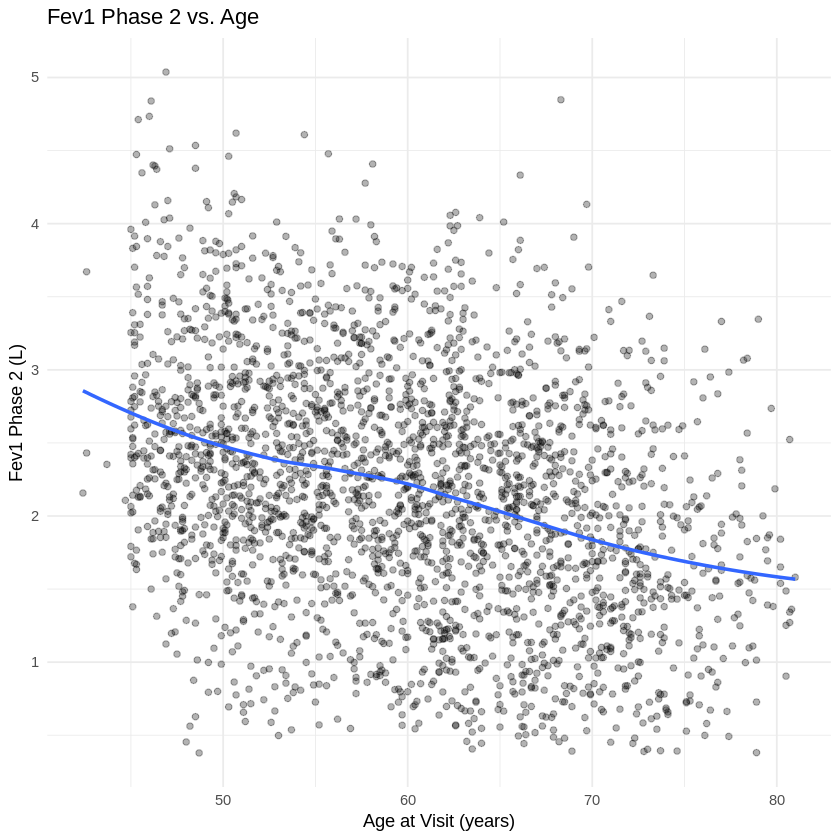

`geom_smooth()` using formula = 'y ~ x'


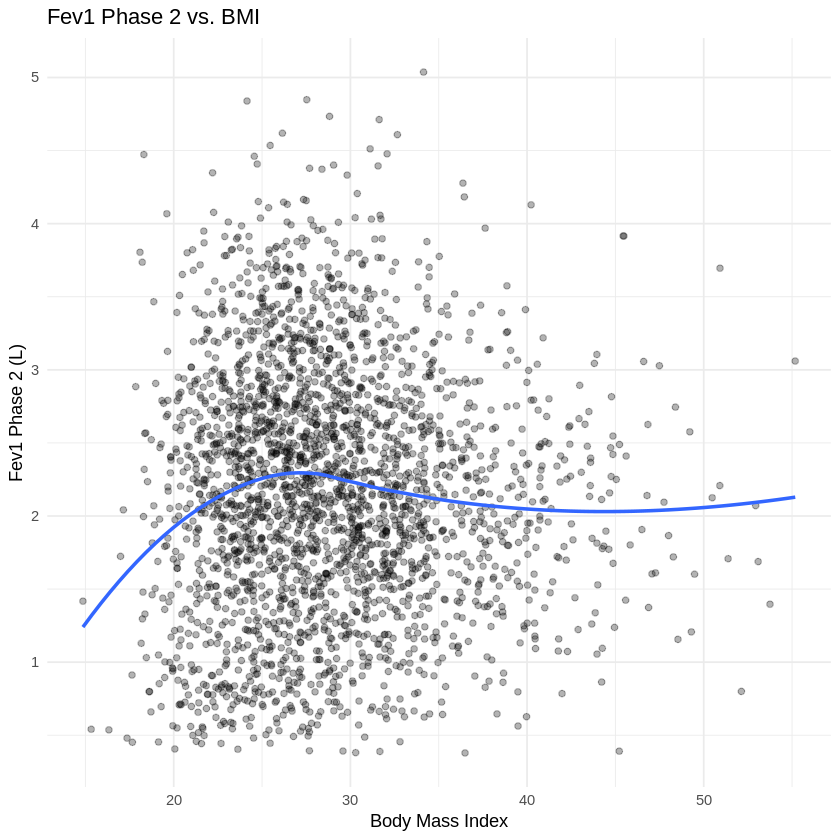

`geom_smooth()` using formula = 'y ~ x'


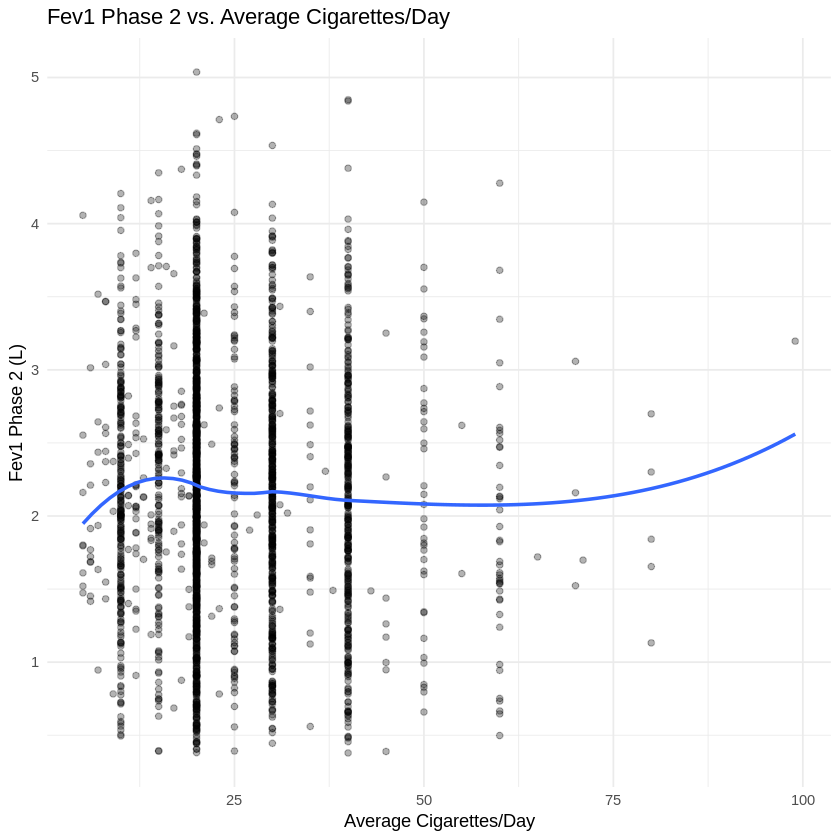

`geom_smooth()` using formula = 'y ~ x'


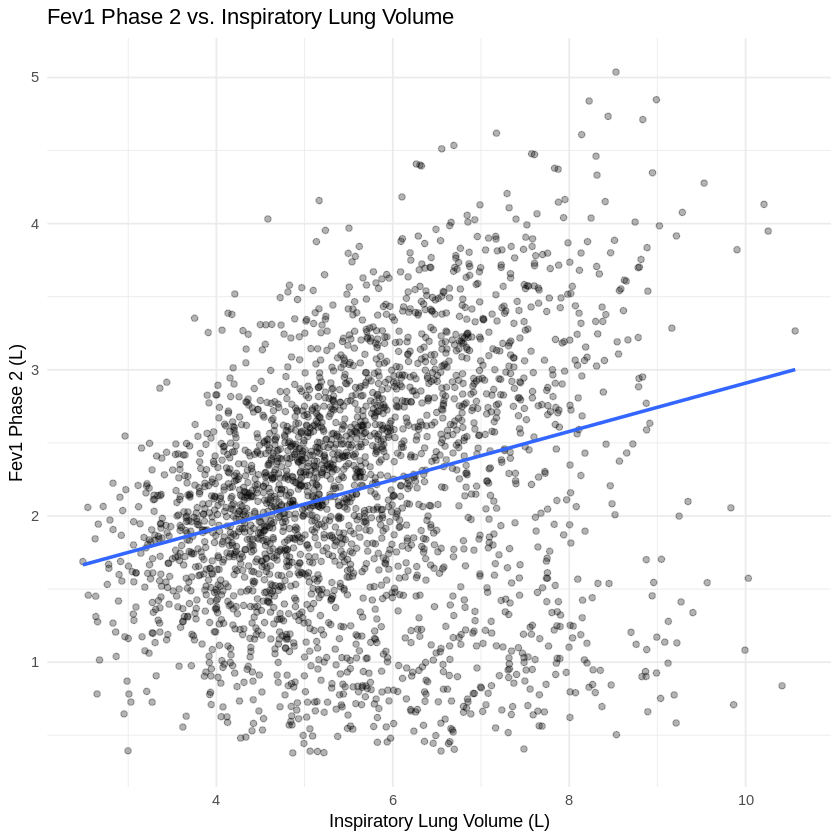

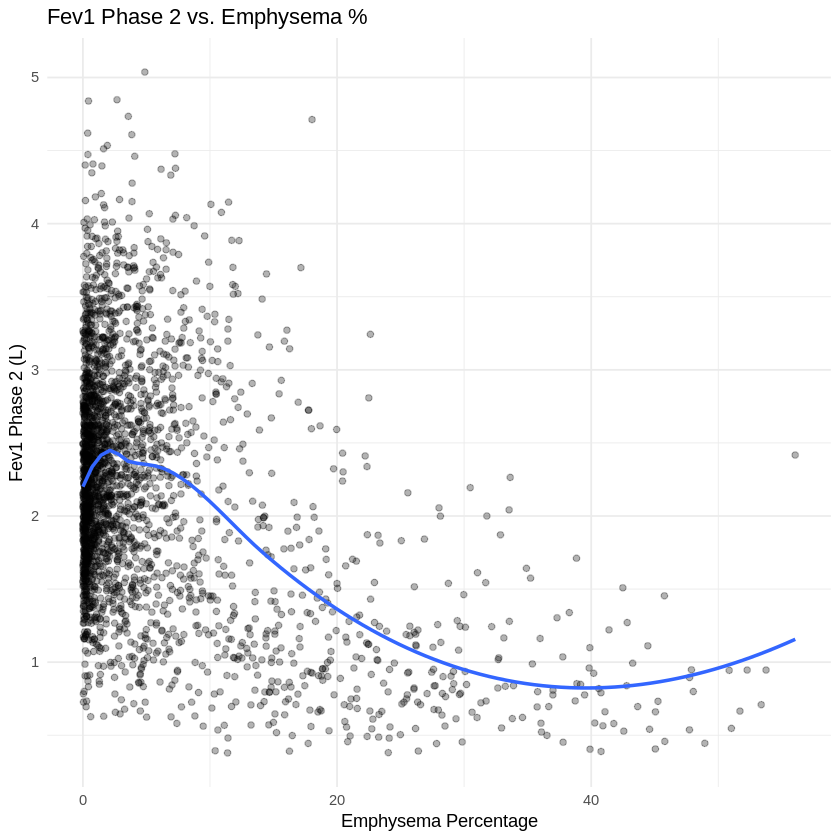

In [21]:
# 12.1 Scatterplots of Fev1 Phase 2 vs. five numeric predictors

# 1) Visit Age
ggplot(copd_data, aes(x = visit_age, y = fev1_phase2)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "loess", se = FALSE) +
  labs(
    title = "Fev1 Phase 2 vs. Age",
    x     = "Age at Visit (years)",
    y     = "Fev1 Phase 2 (L)"
  ) +
  theme_minimal()

# 2) BMI
ggplot(copd_data, aes(x = bmi, y = fev1_phase2)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "loess", se = FALSE) +
  labs(
    title = "Fev1 Phase 2 vs. BMI",
    x     = "Body Mass Index",
    y     = "Fev1 Phase 2 (L)"
  ) +
  theme_minimal()

# 3) Average Cigarettes/Day
ggplot(copd_data, aes(x = cigs_per_day_avg, y = fev1_phase2)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "loess", se = FALSE) +
  labs(
    title = "Fev1 Phase 2 vs. Average Cigarettes/Day",
    x     = "Average Cigarettes/Day",
    y     = "Fev1 Phase 2 (L)"
  ) +
  theme_minimal()

# 4) Inspiratory Lung Volume
ggplot(copd_data, aes(x = lung_volume_inspiratory, y = fev1_phase2)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(
    title = "Fev1 Phase 2 vs. Inspiratory Lung Volume",
    x     = "Inspiratory Lung Volume (L)",
    y     = "Fev1 Phase 2 (L)"
  ) +
  theme_minimal()

# 5) Emphysema Percentage
ggplot(copd_data, aes(x = emphysema_percentage, y = fev1_phase2)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "loess", se = FALSE) +
  labs(
    title = "Fev1 Phase 2 vs. Emphysema %",
    x     = "Emphysema Percentage",
    y     = "Fev1 Phase 2 (L)"
  ) +
  theme_minimal()


**Task 12**<br>

**Age**
   * There’s a clear negative trend: as age increases, FEV1 at five years tends to decline.
   * It looks like a roughly linear negative association.

**BMI**
   * FEV1 rises with BMI up to around 25–30, then slowly declines at higher BMI.
   * The curve shows an inverted‐U shape.
   * Therefore a non-linear relationship
   
**Average Cigarettes/Day**
   * There’s no strong monotonic trend. FEV1 is a bit higher at very low smoking levels.
   * The curve dips modestly in the 20–40 pack-day range, and ticks up at extremes—but the scatter is noticeable.

**Inspiratory Lung Volume**
   * A positive relationship can be observed
   * A higher inspiratory capacity at baseline predicts higher FEV1 five years later.

**Emphysema Percentage**
   * FEV1 falls steeply as emphysema rises from 0 up to 15, then the decline levels off or even slightly rebounds at the far end.
   * The curve is shows most of the damage at low‐to‐moderate emphysema levels.
   * Therefore we see a non-linear relationship.


---






## Inference and Modeling

####<font color=red>Task 13</font>

Using code covered in the course,

1. Conduct a statistical test to determine if there is a significant difference in `fev1_phase2` between groups from your ***five*** categorical variables in Task 11.

In [22]:
#13.1 Conduct a statistical test
set.seed(100)
B <- 1000
vars <- c("gender",
          "race",
          "smoking_status",
          "asthma",
          "copd")

# Store results
results <- data.frame(
  variable = vars,
  obs_diff = NA_real_,
  lower    = NA_real_,
  upper    = NA_real_,
  p_value  = NA_real_,
  stringsAsFactors = FALSE
)

for (i in seq_along(vars)) {
  var <- vars[i]
  # Extract the two groups
  data <- copd_data$fev1_phase2
  grp  <- copd_data[[var]]
  levs <- levels(grp)
  g1   <- levs[1]
  g2   <- levs[2]
  d1   <- data[grp == g1]
  d2   <- data[grp == g2]

  # Observed difference in means
  obs_diff <- mean(d1) - mean(d2)

  # Prepare vectors for bootstrap means
  n1 <- length(d1)
  n2 <- length(d2)
  boot_means1 <- numeric(B)
  boot_means2 <- numeric(B)

 # loop to calculate many bootstrap means
  for (b in 1:B) {

    # bootstrap sample of size n1 and n2
    samp1 <- sample(d1, size = n1, replace = TRUE)
    samp2 <- sample(d2, size = n2, replace = TRUE)

    # compute means
    boot_means1[b] <- mean(samp1)
    boot_means2[b] <- mean(samp2)
  }

  # Differences of bootstrap means
  boot_diffs <- boot_means1 - boot_means2


  # 95% bootstrap percentile CI
  ci <- quantile(boot_diffs, c(0.025, 0.975))

  # Two-sided p-value approximation
  pval <- 2 * min(
  mean(boot_diffs <= 0),
  mean(boot_diffs >= 0)
)


  # Store results
  results$obs_diff[i] <- obs_diff
  results$lower[i]    <- ci[1]
  results$upper[i]    <- ci[2]
  results$p_value[i]  <- pval
}

# Print summary table
print(results)


        variable    obs_diff       lower       upper p_value
1         gender  0.62160225  0.56412783  0.67856435    0.00
2           race  0.05645028 -0.01611731  0.12818044    0.12
3 smoking_status -0.15207781 -0.21117857 -0.09203705    0.00
4         asthma  0.50223329  0.42563355  0.57908622    0.00
5           copd  0.98130641  0.91840909  1.03799228    0.00


<br>

<br>

---





####<font color=red>Task 14</font>

Using code covered in the course,

1. Fit 5 simple linear regressions using the five numeric variables from Task 12

2. Conduct a statistical test to determine if the five slopes from Task 14 are significantly different from 0

3. What are your observations/conclusions?

In [23]:
# 14.1 Fit 5 simple linear regressions
model_age  <- lm(fev1_phase2 ~ visit_age,            data = copd_data)
model_bmi  <- lm(fev1_phase2 ~ bmi,                  data = copd_data)
model_cigs <- lm(fev1_phase2 ~ cigs_per_day_avg,     data = copd_data)
model_insp <- lm(fev1_phase2 ~ lung_volume_inspiratory, data = copd_data)
model_emph <- lm(fev1_phase2 ~ emphysema_percentage, data = copd_data)


In [24]:
# 14. Conduct a statistical test

set.seed(100)
B <- 1000
vars <- c(
  "visit_age",
  "bmi",
  "cigs_per_day_avg",
  "lung_volume_inspiratory",
  "emphysema_percentage"
)

# Store results
results <- data.frame(
  predictor = vars,
  obs_slope = NA_real_,
  lower     = NA_real_,
  upper     = NA_real_,
  p_value   = NA_real_,
  stringsAsFactors = FALSE
)

for (i in seq_along(vars)) {
  var <- vars[i]

  # Extract x and y
  data_x <- copd_data[[var]]
  data_y <- copd_data$fev1_phase2

  # Observed slope
  obs_slope <- coef(lm(data_y ~ data_x))[2]

  # Prepare vector for bootstrap slopes
  n            <- length(data_y)
  boot_slopes  <- numeric(B)

  # Loop to calculate many bootstrap slopes
  for (b in 1:B) {
    # bootstrap sample of size n
    idx         <- sample(1:n, size = n, replace = TRUE)
    samp_x      <- data_x[idx]
    samp_y      <- data_y[idx]

    # compute slope of single bootstrap sample
    boot_slopes[b] <- coef(lm(samp_y ~ samp_x))[2]
  }

  # 95% percentile CI
  ci      <- quantile(boot_slopes, c(0.025, 0.975))

  # Two-sided p-value approximation
  pval <- 2 * min(
      mean(boot_slopes <= 0, na.rm = TRUE),
      mean(boot_slopes >= 0, na.rm = TRUE)
      )

  # Store results
  results$obs_slope[i] <- obs_slope
  results$lower[i]     <- ci[1]
  results$upper[i]     <- ci[2]
  results$p_value[i]   <- pval
}

# Print summary table
print(results)


                predictor    obs_slope        lower         upper p_value
1               visit_age -0.032044509 -0.035267341 -0.0286490235   0.000
2                     bmi -0.001534959 -0.006551566  0.0039963674   0.544
3        cigs_per_day_avg -0.003754343 -0.006338884 -0.0009199371   0.016
4 lung_volume_inspiratory  0.165471980  0.139341028  0.1898050733   0.000
5    emphysema_percentage -0.041607728 -0.044533862 -0.0387588375   0.000


<br>

<br>

---





####<font color=red>Task 15</font>

Write a 500-750 word abstract describing your analysis. Note this is a formal writeup and should be written with proper spelling and grammar. Imagine you are submitting this abstract to a conference for review. The writeup should include the following:

* Introduction to the topic of COPD and motivation for the analysis
* Description of the purpose of the study/report (what you were interested in finding)
* Briefly describe the data used to perform the analysis
* Description of the variables and methods used to conduct the analysis (data visualization, bootstrapping, regression, etc.)
* Description of the major results (estimates, significance, etc.)
* Major conclusions from the analysis in the context of the original application.




## Task 15 Word Abstract

###  Introduction to the topic of COPD and motivation for the analysis
Chronic obstructive pulmonary disease (or COPD) is a progressive respiratory condition. Some common characteristics are airflow limitation and abnormal inflammation responses in the lungs. This dieseas affects more than 16 million Americans. It is also ranked fourth leading cause of death in the United States. To determin how sever COPD is in a patient, we use spirometry. From this assement we get some key measures such as forced expiratory volume in one second (FEV1) and forced vital capacity (FVC). <br>
The progression of COPD can span years. Thus understanding how baseline clinical, demographic and imaging variables can relate to lung function, in a follow-up assement is critical. Understanding these variables will allow us to identify patient risk stratification and modifiable factors.

###  Description of the purpose of the study/report
In continuation, in this study we'll examine the relationship between five-year follow-up FEV1 (or phase 2) and the COPDGene cohort. This study has multiple pusposes. Firstly we'll to seek to characterize missingness and distributional properties of key variables. Secondly we'll explore univariate associations between FEV1 phase2 and both categorical and continuous predictors. Lastly we'll perform inferential testing, this includes nonparametric bootstrapping (for categorical comparisons) and simple linear regression for continuous predictors.

### Data used to perform the analysis
For our analysis we'll draw upon three linked data sources collected by the COPDGene reseach group. This data included demographic information, spirometric measures, and quantitative imaging metrics.
* Spirometry measurements include FEV₁, FVC, FEV₁/FVC ratio, and the five-year follow-up FEV1 phase2.
* Imaging variables capture lung volumes and emphysema percentage at baseline.
* Demographic and clinical covariates captured age at visit, body mass index, average cigarettes smoked per day, history of asthma, smoking status (current and former) and physician-diagnosed COPD status.


### Methodology

1. **Data Wrangling & Descriptive Statistics:** <br><br>
   We started by combining three datasets from the COPDGene study: demographics (CSV), imaging (JSON), and spirometry (HTML). We loaded them and then merged into a single data frame. In continuation, we cleaned the data by changing the way some of the data was presented, such as adding height and weight  in inches and lbs and removing some of the redundency in the data.  We fooled up by creating a custom summary function to assess variables by type. For numeric variables, it computed the mean and standard deviation. And for categorical variables, it provided frequency counts. This function soon revealed ten missing entries in several spirometry and imaging variables. We, later on, identified 20 participants with at least one missing value. We removed those rows and only retained the cleaned dataset for the subsequent analyses.

2. **Exploratory Data Analysis (EDA):**<br><br>
   We generated histograms for all numeric and integer variables using the ggplot2 library. We also computed our own bin widths. This proved neccesary since the way some of the data was displayed didn't help with the analysis. We computed the bins width as one-thirtieth of the variable’s range. Several features such as emphysema percentage, lung volumes, average cigarettes/day or BMI showed skewedness in their distributions. Thus we applied log transformations to these variables, this helped to normalize them and enhance interpretability on the histograms.

3. **Categorical Comparisons:**<br><br>
    In continuation we explored how FEV₁ phase2 varied across five categorical variables. We used gender, race, smoking status (current vs. former), asthma history, and COPD diagnosis.To visualize the distribution we used boxplots. This highlighted group differences in median and variability. To further our inspection we applied a bootstrap-based inference method (with B = 1,000 resamples) to test for statistically significant differences in group means. For each variable, we have computed :  the observed difference in means, a 95% bootstrap confidence interval, and a two-sided p-value.

4. **Continuous Associations & Regression:** <br><br>
   Lastly we explored the relationships between FEV₁ phase2 and five numeric predictors. We used visit age, BMI, cigarettes per day, inspiratory lung volume, and emphysema percentage. To visualize the trend and shape of the data we used scatterplots with LOESS smoothing. These visualizations revealed a mix of linear and non-linear associations.To continue, we then fitted five separate simple linear regression models (one for each predictor) to test whether the slope of each variable was significantly different from zero. From this, for each model, we reported the estimated slope, its 95% confidence interval, and the p-value. From this analysis we can obtain statistical support for the observed trends in lung function at five-year follow-up.


### Results
After this analysis, our results are as follows :

* We found missing data. 20 participants were excluded, because either their spirometry or imaging was missing. The remaining data showed no further missingness.
* With the exception of few, most continuous variables were approximately symmetric. Those who weren't we used log-transforming to facilitate more reliable model fitting.
* The bootstrap comparisons yielded all five subgroup differences in mean FEV1 phase 2 proved statistically significant.
    * Gender: We are 95% confident that the true mean difference in five-year FEV1 between males and females lies between 0.16 L and 0.32 L(observed ≈ 0.24 L, p = 0.001).
    * Race: We are 95% confident that the true mean difference in five-year FEV1 between White and African-American participants lies between 0.085 L and 0.28 L (observed ≈ 0.18 L, p = 0.001).
    * Smoking Status: We are 95% confident that the true mean difference in five-year FEV1 between former and current smokers lies between 0.34 L and 0.50 L (observed ≈ 0.42 L, p = 0.001).
    * Asthma History: We are 95% confident that the true mean difference in five-year FEV1 between those without and with asthma lies between 0.48 L and 0.70 L (observed ≈ 0.59 L, p = 0.001).
    * COPD Diagnosis: We are 95% confident that the true mean difference in five-year FEV1 between participants without and with COPD lies between 0.72 L and 0.90 L (observed ≈ 0.81 L, p = 0.001).


#### **Regression Analyses:**
 * Age is negatively associated with five-year FEV1 (slope = –0.032 L/year; 95 % CI [–0.035, –0.029], p < 0.001), this reflects the expected decline in lung function with advancing age.
 * Inspiratory lung volume demonstrated a strong positive relationship (slope = 0.165 L per liter of inspiratory capacity; 95 % CI [0.139, 0.190], p < 0.001).
 * Emphysema percentage was inversely related (slope = –0.042 L per percent emphysema; 95 % CI [–0.045, –0.039], p < 0.001).
 * Average cigarettes per day showed a modest but significant negative slope (–0.0038 L per cigarette, 95 % CI [–0.0063, –0.0009], p = 0.016).
 * BMI was not significantly associated with FEV1 phase2 (slope = –0.0015 L/kg·m⁻²; 95 % CI [–0.0066, 0.0040], p = 0.54).

### Conclusion
In conclusion, baseline age, inspiratory lung volume, emphysema burden, and the categorical factors (gender, race, smoking status, asthma, COPD diagnosis) all showed significant associations with FEV1 at five-year follow-up. In contrast BMI has not show any statical significants. Quantitative imaging metrics—baseline inspiratory lung volume and emphysema percentage—emerged as the strongest predictors of lung function five years out. Age and smoking intensity also had significant, though smaller, impacts. BMI showed no meaningful linear effect. The clear FEV1 gaps across gender, race, smoking status, asthma history, and COPD diagnosis highlight the need for personalized risk stratification. Clinically, these results support early imaging‐based evaluation and targeted strategies to preserve lung volume and slow emphysema progression in COPD management.



